# **Group 16: airbnb in European cities - Price Prediction**

In [12]:
#import tensorflow as tf
from IPython.display import display, Image
# from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn import tree
import pickle
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from scipy.stats import randint
import graphviz
import xgboost as xgb
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LinearRegression, Ridge, Lasso


## **1. Data loading and merging**

**Dataset Introduction**

This dataset offers a comprehensive examination of airbnb prices in popular European cities. 

It covers a range of attributes for each listing, including room types, cleanliness and satisfaction ratings, number of bedrooms, distance from the city center, and more. The dataset provides a detailed understanding of airbnb prices for both weekdays and weekends. By employing spatial econometric methods, we analyze the factors that influence airbnb prices across these cities.

The airbnb in our dataset are located in 10 cities in Europe which include Amsterdam, Athens, Barcelona, Berlin, Rome, Vienna, Paris, London, Lisbon, Budapest.

Source: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities



**Methodology**

The first step is doing the data cleaning and exploratory data analysis. 

Next, we implemented different Machine Learning models to predict the airbnb prices:
- Decision Tree
- Random Forest
- XGBoost
- Linear Regression
- Ridge Regression
- Lasso Regression
- Neural Network

We also applied techniques such as feature selection, target variable log-transformation and hyperparameter tuning to improve model performance.

In [48]:
# Data Loading
data_files = [
    '../dataset/amsterdam_weekdays.csv',
    '../dataset/amsterdam_weekends.csv',
    '../dataset/athens_weekdays.csv',
    '../dataset/athens_weekends.csv',
    '../dataset/barcelona_weekdays.csv',
    '../dataset/athens_weekends.csv',
    '../dataset/barcelona_weekdays.csv',
    '../dataset/barcelona_weekends.csv',
    '../dataset/berlin_weekdays.csv',
    '../dataset/berlin_weekends.csv',
    '../dataset/budapest_weekdays.csv',
    '../dataset/budapest_weekends.csv',
    '../dataset/lisbon_weekdays.csv',
    '../dataset/lisbon_weekends.csv',
    '../dataset/london_weekdays.csv',
    '../dataset/london_weekends.csv',
    '../dataset/paris_weekdays.csv',
    '../dataset/paris_weekends.csv',
    '../dataset/rome_weekdays.csv',
    '../dataset/rome_weekends.csv',
    '../dataset/vienna_weekdays.csv',
    '../dataset/vienna_weekends.csv'
]

In [5]:
df = []

for index in range(len(data_files)):
    data_file = pd.read_csv(data_files[index])

    file_info = data_files[index].split('/')[2].split('_')
    
    data_file['city'] = file_info[0]
    data_file['day'] = file_info[1].split('.')[0]
    
    df.append(data_file)

df = pd.concat(df)
    

In [59]:
df = df.drop(columns=['Unnamed: 0'])
df

realSum        room_type  room_shared  room_private  person_capacity  \
0     194.033698     Private room        False          True              2.0   
1     344.245776     Private room        False          True              4.0   
2     264.101422     Private room        False          True              2.0   
3     433.529398     Private room        False          True              4.0   
4     485.552926     Private room        False          True              2.0   
...          ...              ...          ...           ...              ...   
1794  715.938574  Entire home/apt        False         False              6.0   
1795  304.793960  Entire home/apt        False         False              2.0   
1796  637.168969  Entire home/apt        False         False              2.0   
1797  301.054157     Private room        False          True              2.0   
1798  133.230489     Private room        False          True              4.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
0                 False      1    0                10.0   
1                 False      0    0                 8.0   
2                 False      0    1                 9.0   
3                 False      0    1                 9.0   
4                  True      0    0                10.0   
...                 ...    ...  ...                 ...   
1794              False      0    1                10.0   
1795              False      0    0                 8.0   
1796              False      0    0                10.0   
1797              False      0    0                10.0   
1798               True      1    0                10.0   

      guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                           93.0  ...  5.022964    2.539380   78.690379   
1                           85.0  ...  0.488389    0.239404  631.176378   
2                           87.0  ...  5.748312    3.651621   75.275877   
3                           90.0  ...  0.384862    0.439876  493.272534   
4                           98.0  ...  0.544738    0.318693  552.830324   
...                          ...  ...       ...         ...         ...   
1794                       100.0  ...  0.530181    0.135447  219.402478   
1795                        86.0  ...  0.810205    0.100839  204.970121   
1796                        93.0  ...  0.994051    0.202539  169.073402   
1797                        87.0  ...  3.044100    0.287435  109.236574   
1798                        93.0  ...  1.263932    0.480903  150.450381   

      attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0            4.166708   98.253896         6.846473   4.90569  52.41772   
1           33.421209  837.280757        58.342928   4.90005  52.37432   
2            3.985908   95.386955         6.646700   4.97512  52.36103   
3           26.119108  875.033098        60.973565   4.89417  52.37663   
4           29.272733  815.305740        56.811677   4.90051  52.37508   
...               ...         ...              ...       ...       ...   
1794        15.712158  438.756874        10.604584  16.37940  48.21136   
1795        14.678608  342.182813         8.270427  16.38070  48.20296   
1796        12.107921  282.296424         6.822996  16.38568  48.20460   
1797         7.822803  158.563398         3.832416  16.34100  48.19200   
1798        10.774264  225.247293         5.444140  16.39066  48.20811   

           city       day  
0     amsterdam  weekdays  
1     amsterdam  weekdays  
2     amsterdam  weekdays  
3     amsterdam  weekdays  
4     amsterdam  weekdays  
...         ...       ...  
1794     vienna  weekends  
1795     vienna  weekends  
1796     vienna  weekends  
1797     vienna  weekends  
1798     vienna  weekends  

[55889 rows x 21 columns]

In [6]:
df = df.reset_index(drop=True)
df


Unnamed: 0     realSum        room_type  room_shared  room_private  \
0               0  194.033698     Private room        False          True   
1               1  344.245776     Private room        False          True   
2               2  264.101422     Private room        False          True   
3               3  433.529398     Private room        False          True   
4               4  485.552926     Private room        False          True   
...           ...         ...              ...          ...           ...   
55884        1794  715.938574  Entire home/apt        False         False   
55885        1795  304.793960  Entire home/apt        False         False   
55886        1796  637.168969  Entire home/apt        False         False   
55887        1797  301.054157     Private room        False          True   
55888        1798  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
55884              6.0              False      0    1                10.0   
55885              2.0              False      0    0                 8.0   
55886              2.0              False      0    0                10.0   
55887              2.0              False      0    0                10.0   
55888              4.0               True      1    0                10.0   

       ...      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0      ...  5.022964    2.539380   78.690379         4.166708   98.253896   
1      ...  0.488389    0.239404  631.176378        33.421209  837.280757   
2      ...  5.748312    3.651621   75.275877         3.985908   95.386955   
3      ...  0.384862    0.439876  493.272534        26.119108  875.033098   
4      ...  0.544738    0.318693  552.830324        29.272733  815.305740   
...    ...       ...         ...         ...              ...         ...   
55884  ...  0.530181    0.135447  219.402478        15.712158  438.756874   
55885  ...  0.810205    0.100839  204.970121        14.678608  342.182813   
55886  ...  0.994051    0.202539  169.073402        12.107921  282.296424   
55887  ...  3.044100    0.287435  109.236574         7.822803  158.563398   
55888  ...  1.263932    0.480903  150.450381        10.774264  225.247293   

       rest_index_norm       lng       lat       city       day  
0             6.846473   4.90569  52.41772  amsterdam  weekdays  
1            58.342928   4.90005  52.37432  amsterdam  weekdays  
2             6.646700   4.97512  52.36103  amsterdam  weekdays  
3            60.973565   4.89417  52.37663  amsterdam  weekdays  
4            56.811677   4.90051  52.37508  amsterdam  weekdays  
...                ...       ...       ...        ...       ...  
55884        10.604584  16.37940  48.21136     vienna  weekends  
55885         8.270427  16.38070  48.20296     vienna  weekends  
55886         6.822996  16.38568  48.20460     vienna  weekends  
55887         3.832416  16.34100  48.19200     vienna  weekends  
55888         5.444140  16.39066  48.20811     vienna  weekends  

[55889 rows x 22 columns]

## **2. Data Exploration and Cleaning**

### **2.1. Dataset summary and initial cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55889 entries, 0 to 55888
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  55889 non-null  int64  
 1   realSum                     55889 non-null  float64
 2   room_type                   55889 non-null  object 
 3   room_shared                 55889 non-null  bool   
 4   room_private                55889 non-null  bool   
 5   person_capacity             55889 non-null  float64
 6   host_is_superhost           55889 non-null  bool   
 7   multi                       55889 non-null  int64  
 8   biz                         55889 non-null  int64  
 9   cleanliness_rating          55889 non-null  float64
 10  guest_satisfaction_overall  55889 non-null  float64
 11  bedrooms                    55889 non-null  int64  
 12  dist                        55889 non-null  float64
 13  metro_dist                  558

In [8]:
# Check missing values
# There is no missing values 
df.isna().sum().sum()

0

In [9]:
# Drop duplicates
df = df.drop_duplicates()

In [10]:
# Over 4000 duplicated rows dropped
df = df.reset_index(drop=True)
df

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0               0  194.033698     Private room        False          True   
1               1  344.245776     Private room        False          True   
2               2  264.101422     Private room        False          True   
3               3  433.529398     Private room        False          True   
4               4  485.552926     Private room        False          True   
...           ...         ...              ...          ...           ...   
51702        1794  715.938574  Entire home/apt        False         False   
51703        1795  304.793960  Entire home/apt        False         False   
51704        1796  637.168969  Entire home/apt        False         False   
51705        1797  301.054157     Private room        False          True   
51706        1798  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702              6.0              False      0    1                10.0   
51703              2.0              False      0    0                 8.0   
51704              2.0              False      0    0                10.0   
51705              2.0              False      0    0                10.0   
51706              4.0               True      1    0                10.0   

       ...      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0      ...  5.022964    2.539380   78.690379         4.166708   98.253896   
1      ...  0.488389    0.239404  631.176378        33.421209  837.280757   
2      ...  5.748312    3.651621   75.275877         3.985908   95.386955   
3      ...  0.384862    0.439876  493.272534        26.119108  875.033098   
4      ...  0.544738    0.318693  552.830324        29.272733  815.305740   
...    ...       ...         ...         ...              ...         ...   
51702  ...  0.530181    0.135447  219.402478        15.712158  438.756874   
51703  ...  0.810205    0.100839  204.970121        14.678608  342.182813   
51704  ...  0.994051    0.202539  169.073402        12.107921  282.296424   
51705  ...  3.044100    0.287435  109.236574         7.822803  158.563398   
51706  ...  1.263932    0.480903  150.450381        10.774264  225.247293   

       rest_index_norm       lng       lat       city       day  
0             6.846473   4.90569  52.41772  amsterdam  weekdays  
1            58.342928   4.90005  52.37432  amsterdam  weekdays  
2             6.646700   4.97512  52.36103  amsterdam  weekdays  
3            60.973565   4.89417  52.37663  amsterdam  weekdays  
4            56.811677   4.90051  52.37508  amsterdam  weekdays  
...                ...       ...       ...        ...       ...  
51702        10.604584  16.37940  48.21136     vienna  weekends  
51703         8.270427  16.38070  48.20296     vienna  weekends  
51704         6.822996  16.38568  48.20460     vienna  weekends  
51705         3.832416  16.34100  48.19200     vienna  weekends  
51706         5.444140  16.39066  48.20811     vienna  weekends  

[51707 rows x 22 columns]

In [11]:
# Save df in a csv file
df.to_csv('../dataset/europe_airbnb.csv')

In [12]:
df.describe()

Unnamed: 0       realSum  person_capacity         multi  \
count  51707.000000  51707.000000     51707.000000  51707.000000   
mean    1620.502388    279.879591         3.161661      0.291353   
std     1217.380366    327.948386         1.298545      0.454390   
min        0.000000     34.779339         2.000000      0.000000   
25%      646.000000    148.752174         2.000000      0.000000   
50%     1334.000000    211.343089         3.000000      0.000000   
75%     2382.000000    319.694287         4.000000      1.000000   
max     5378.000000  18545.450285         6.000000      1.000000   

                biz  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean       0.350204            9.390624                   92.628232   
std        0.477038            0.954868                    8.945531   
min        0.000000            2.000000                   20.000000   
25%        0.000000            9.000000                   90.000000   
50%        0.000000           10.000000                   95.000000   
75%        1.000000           10.000000                   99.000000   
max        1.000000           10.000000                  100.000000   

          bedrooms          dist    metro_dist    attr_index  attr_index_norm  \
count  51707.00000  51707.000000  51707.000000  51707.000000     51707.000000   
mean       1.15876      3.191285      0.681540    294.204105        13.423792   
std        0.62741      2.393803      0.858023    224.754123         9.807985   
min        0.00000      0.015045      0.002301     15.152201         0.926301   
25%        1.00000      1.453142      0.248480    136.797385         6.380926   
50%        1.00000      2.613538      0.413269    234.331748        11.468305   
75%        1.00000      4.263077      0.737840    385.756381        17.415082   
max       10.00000     25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

### **2.2. Inspection on values and distributions of variables**

In [13]:
df.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'day'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'realSum'}>,
        <AxesSubplot: title={'center': 'person_capacity'}>,
        <AxesSubplot: title={'center': 'multi'}>],
       [<AxesSubplot: title={'center': 'biz'}>,
        <AxesSubplot: title={'center': 'cleanliness_rating'}>,
        <AxesSubplot: title={'center': 'guest_satisfaction_overall'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>],
       [<AxesSubplot: title={'center': 'dist'}>,
        <AxesSubplot: title={'center': 'metro_dist'}>,
        <AxesSubplot: title={'center': 'attr_index'}>,
        <AxesSubplot: title={'center': 'attr_index_norm'}>],
       [<AxesSubplot: title={'center': 'rest_index'}>,
        <AxesSubplot: title={'center': 'rest_index_norm'}>,
        <AxesSubplot: title={'center': 'lng'}>,
        <AxesSubplot: title={'center': 'lat'}>]], dtype=object)

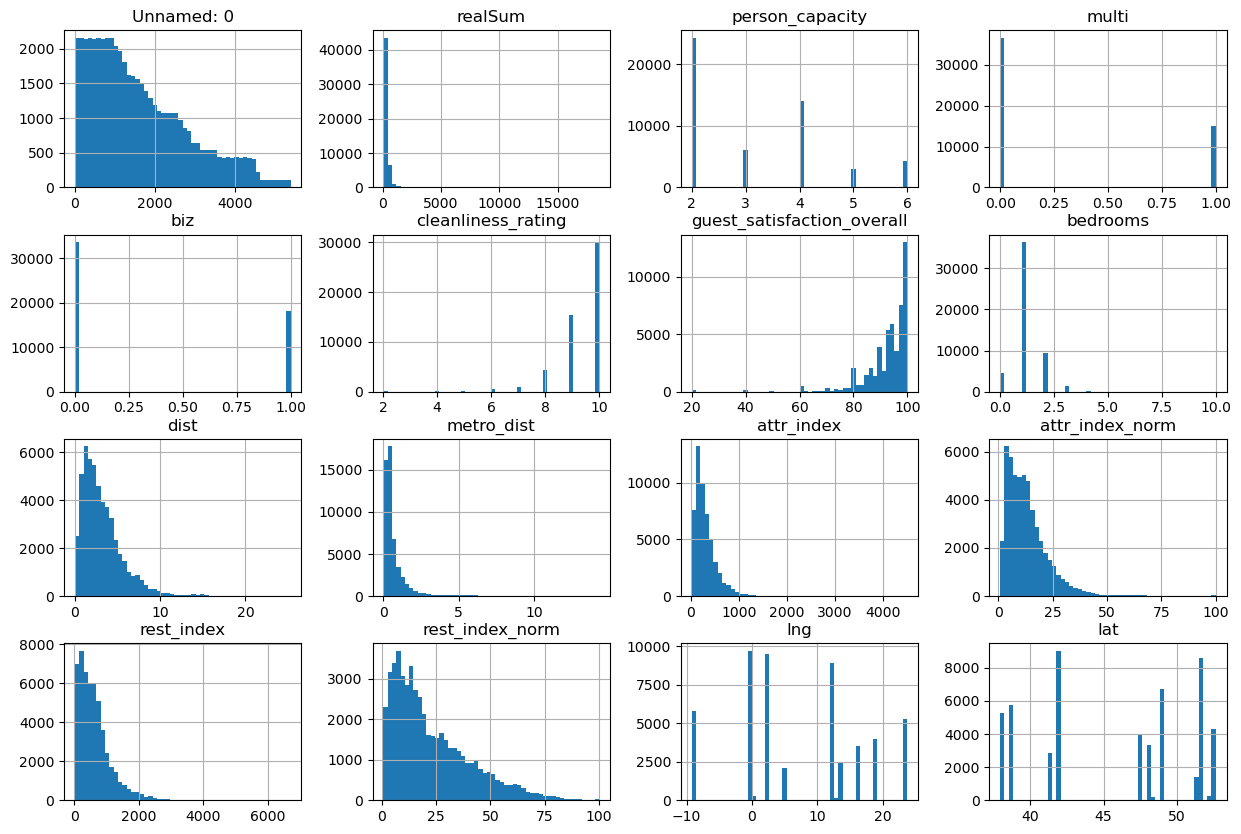

In [14]:
# visually inspect the data - numerical columns
df.hist(bins=50, figsize=(15,10))

Our target variable is realSum - which is highly right skewed. Further investigation on the outliers should be conducted. 

Other data features:
- There's a long tail to a few variables such as attr_index, metro_dist, guest_satisfaction_overall
- They are at different scales

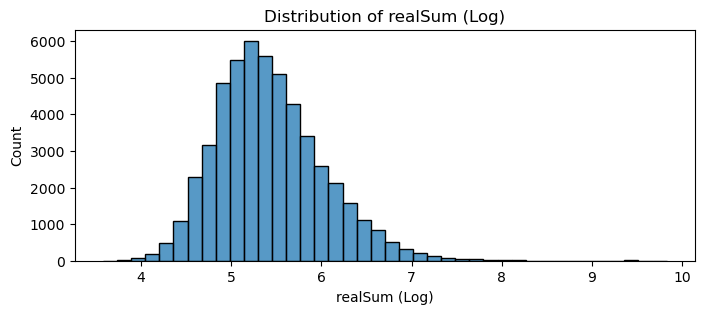

In [15]:
# Look at the distributions of log transformed realSum
# Convert the realSum to log to reduce the effect of the long tail 
# and make the distrubtion more gaussian

fig, axs = plt.subplots(figsize=(8, 3))
sns.histplot(x=np.log1p(df['realSum']), bins=40, ax=axs).set(
    xlabel='realSum (Log)',
    title='Distribution of realSum (Log)'
)

plt.show()

In [16]:
# Categorical columns inspection
cat_cols = [
    'room_type',
    'room_shared',
    'room_private',
    'host_is_superhost',
    'city',
    'day',
    'multi',
    'biz'
]

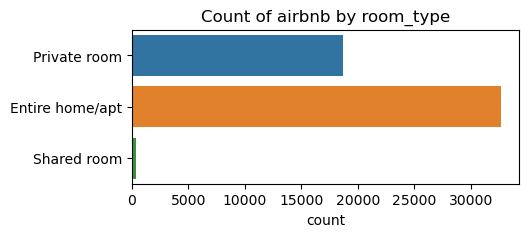

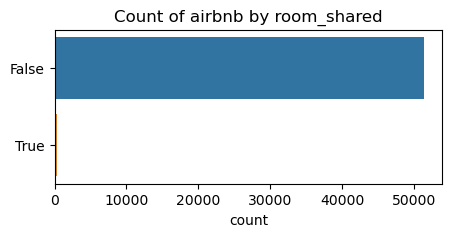

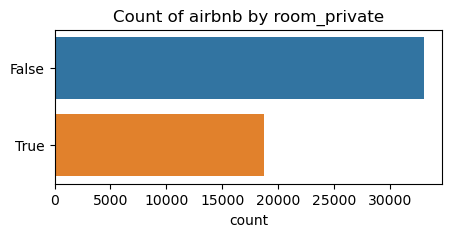

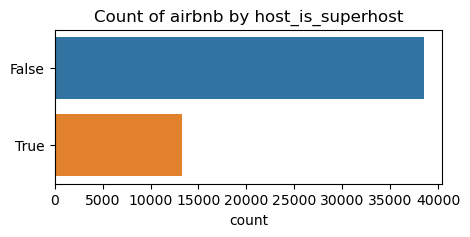

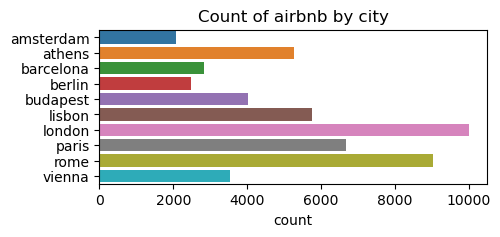

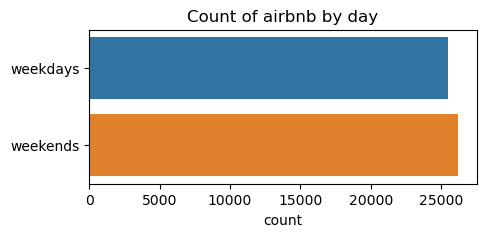

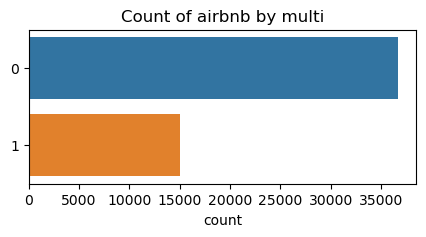

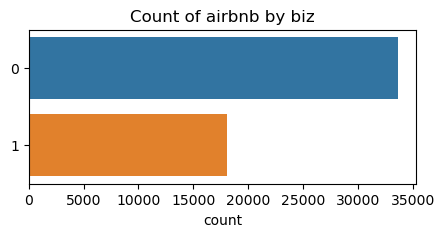

In [17]:
# Distribution of categorical columns
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(5, 2))
    sns.countplot(y=col, data=df).set(ylabel=None, title=f'Count of airbnb by {col}')

The plots show that:
- Most airbnbs are entire home/apt and private rooms. Only a very small number is shared room
- Most hosts are not superhosts
- The majority of our datasets are airbnbs in London, Rome, Paris and Lisbon. Those are also the capital cities with bigger sizes 
- The data points of weekdays and weekends are quite equal


### **2.3. Inspection into relationship between variables**

Feature transforms

In [18]:
df['log_realSum'] = np.log1p(df['realSum'])

In [19]:
# Convert data types of categorical columns to string
df[cat_cols] = df[cat_cols].astype(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  object 
 4   room_private                51707 non-null  object 
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  object 
 7   multi                       51707 non-null  object 
 8   biz                         51707 non-null  object 
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

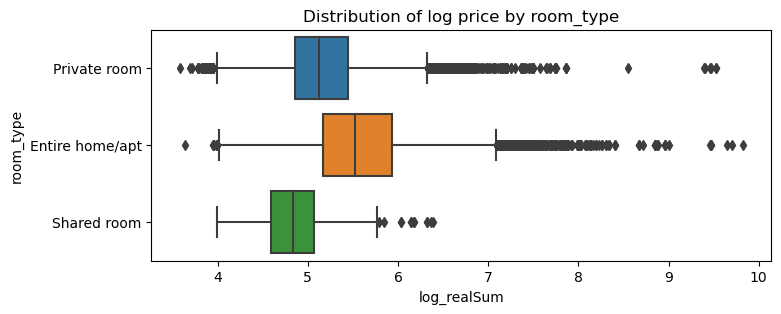

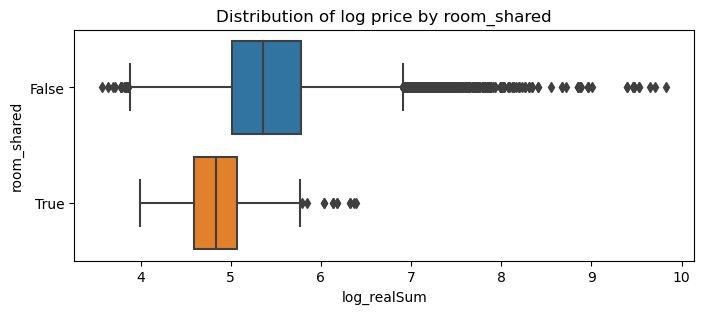

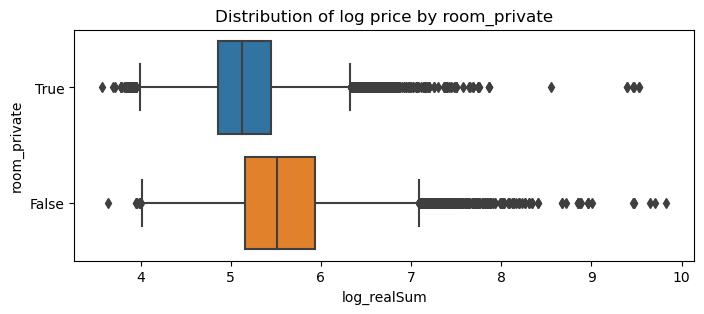

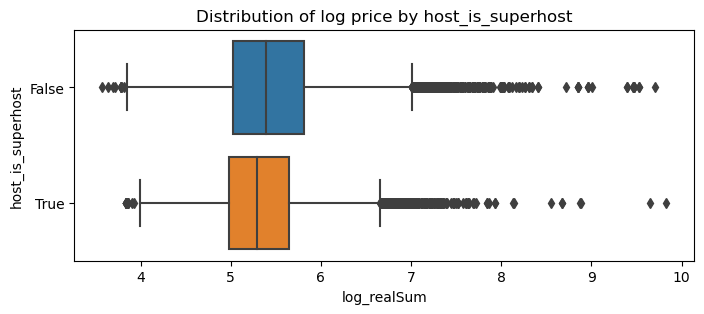

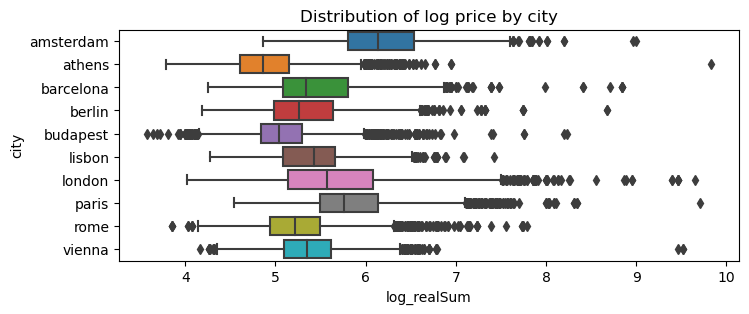

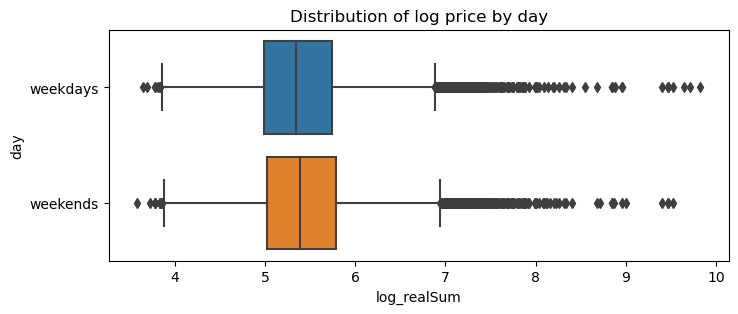

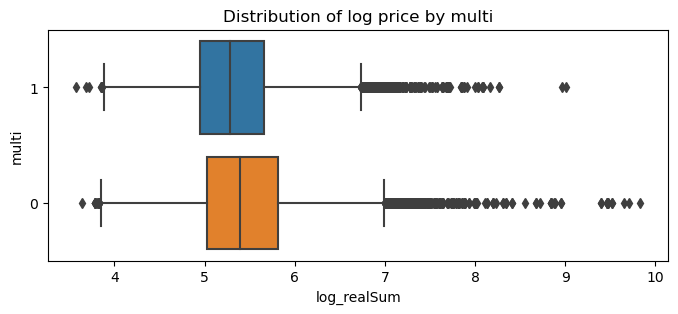

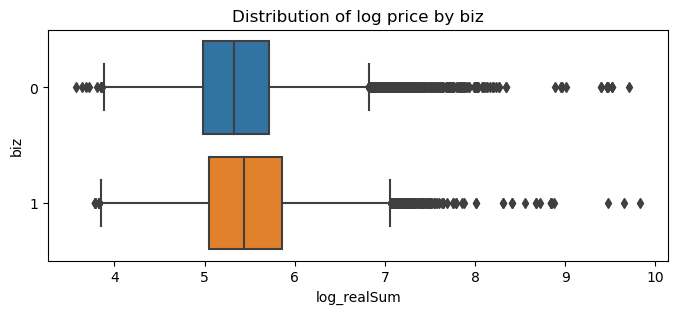

In [21]:
# Distributions of categorical columns by Log realSum
for col in cat_cols:
    fig, ax = plt.subplots(figsize=(8,3))
    sns.boxplot(x='log_realSum', y=col, data=df).set(
        title=f'Distribution of log price by {col}',
    )

The plots show that:
- Prices of entire home/ apt is highest, followed by private room and shared room
- If the room is private, price is higher
- Prices of airbnb in Amsterdam is higest. The 2nd expensive city is Paris, the 3rd is London
- There is no difference of prices between weekdays and weekends, whether the hosts have more than 4 offers or not, and whether the host is superhost or not.

/tmp/ipykernel_8363/3222832345.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(), annot=True, cmap="RdBu", annot_kws={"size": 15}, vmin=-1, vmax=1, fmt='.1f'


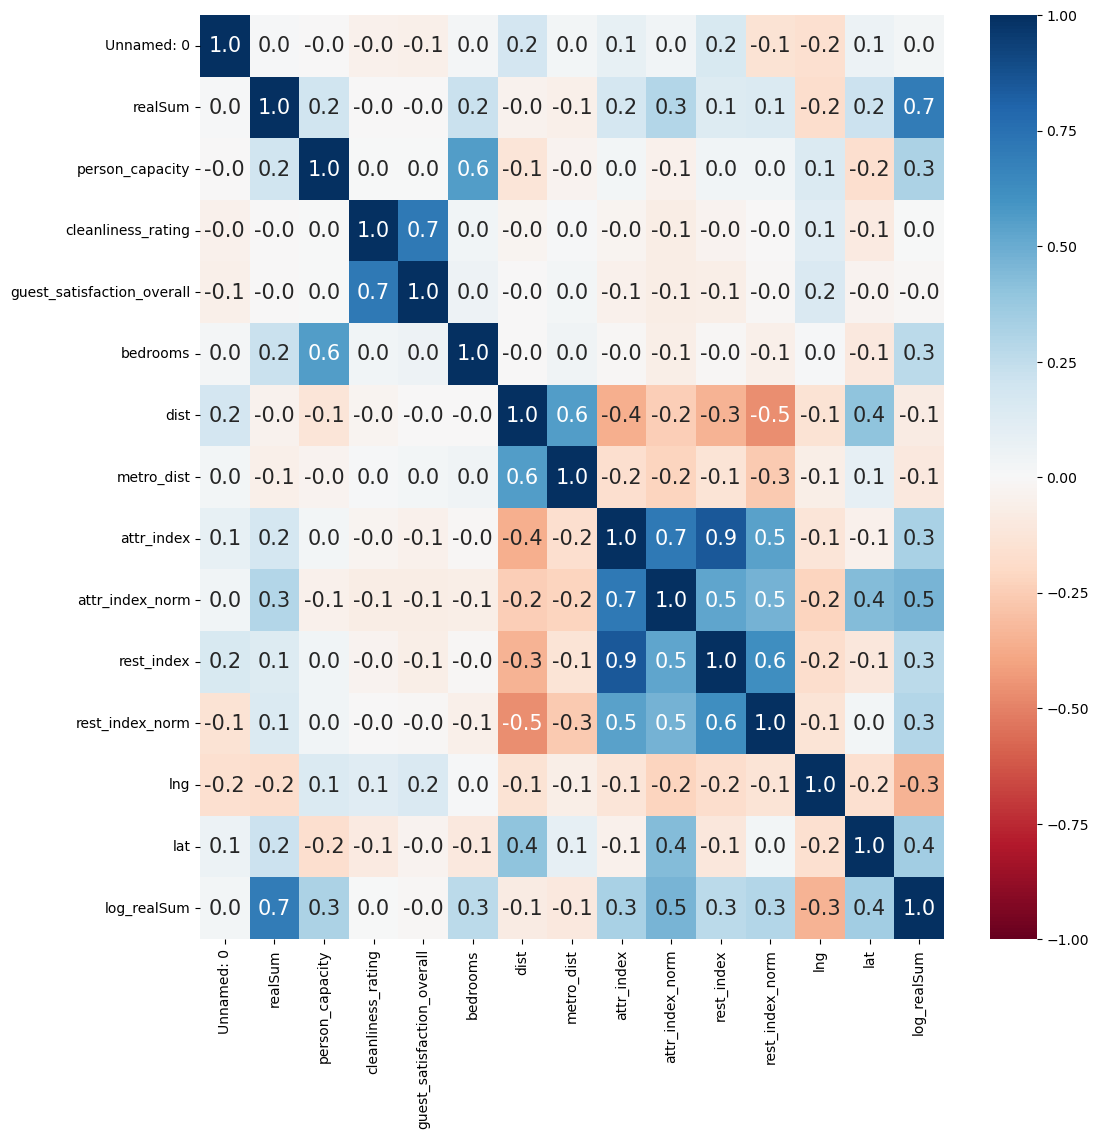

In [22]:
# Correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(
    df.corr(), annot=True, cmap="RdBu", annot_kws={"size": 15}, vmin=-1, vmax=1, fmt='.1f'
)
plt.show()

Overall, there are a few variables which have high correlations with others. Notably, we have:
- log_realSum & attr_index_norm: positive correlation - the higher the attraction index of the airbnb, the higher its price is
- log_realSum & persons_capacity: if more people can stay in an airbnb, its price will be higher. This can be similar with the positive correlation with log_realSum and bedrooms
- log_realSum & rest_index_norm: if the restaurant index is higher, the airbnb's price will be higher.
- attr_index & rest_index: restaurant index is high -> attraction index of the listing will also be high.

Multicollinearity exists so data pre-processing to solve this issue is required if we want to use linear regression model.

In [23]:
# Save df in a csv file
df.to_csv('airbnb.csv')

### **2.4. Data Preparation**

In [24]:
# One hot encoding
dfnew = pd.get_dummies(df, drop_first=True, columns=cat_cols)
dfnew

Unnamed: 0     realSum  person_capacity  cleanliness_rating  \
0               0  194.033698              2.0                10.0   
1               1  344.245776              4.0                 8.0   
2               2  264.101422              2.0                 9.0   
3               3  433.529398              4.0                 9.0   
4               4  485.552926              2.0                10.0   
...           ...         ...              ...                 ...   
51702        1794  715.938574              6.0                10.0   
51703        1795  304.793960              2.0                 8.0   
51704        1796  637.168969              2.0                10.0   
51705        1797  301.054157              2.0                10.0   
51706        1798  133.230489              4.0                10.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                            93.0         1  5.022964    2.539380   78.690379   
1                            85.0         1  0.488389    0.239404  631.176378   
2                            87.0         1  5.748312    3.651621   75.275877   
3                            90.0         2  0.384862    0.439876  493.272534   
4                            98.0         1  0.544738    0.318693  552.830324   
...                           ...       ...       ...         ...         ...   
51702                       100.0         3  0.530181    0.135447  219.402478   
51703                        86.0         1  0.810205    0.100839  204.970121   
51704                        93.0         1  0.994051    0.202539  169.073402   
51705                        87.0         1  3.044100    0.287435  109.236574   
51706                        93.0         1  1.263932    0.480903  150.450381   

       attr_index_norm  ...  city_berlin  city_budapest  city_lisbon  \
0             4.166708  ...            0              0            0   
1            33.421209  ...            0              0            0   
2             3.985908  ...            0              0            0   
3            26.119108  ...            0              0            0   
4            29.272733  ...            0              0            0   
...                ...  ...          ...            ...          ...   
51702        15.712158  ...            0              0            0   
51703        14.678608  ...            0              0            0   
51704        12.107921  ...            0              0            0   
51705         7.822803  ...            0              0            0   
51706        10.774264  ...            0              0            0   

       city_london  city_paris  city_rome  city_vienna  day_weekends  multi_1  \
0                0           0          0            0             0        1   
1                0           0          0            0             0        0   
2                0           0          0            0             0        0   
3                0           0          0            0             0        0   
4                0           0          0            0             0        0   
...            ...         ...        ...          ...           ...      ...   
51702            0           0          0            1             1        0   
51703            0           0          0            1             1        0   
51704            0           0          0            1             1        0   
51705            0           0          0            1             1        0   
51706            0           0          0            1             1        1   

       biz_1  
0          0  
1          0  
2          1  
3          1  
4          0  
...      ...  
51702      1  
51703      0  
51704      0  
51705      0  
51706      0  

[51707 rows x 32 columns]

In [25]:
X = dfnew.drop(columns=['realSum', 'log_realSum'], axis=1)
X

Unnamed: 0  person_capacity  cleanliness_rating  \
0               0              2.0                10.0   
1               1              4.0                 8.0   
2               2              2.0                 9.0   
3               3              4.0                 9.0   
4               4              2.0                10.0   
...           ...              ...                 ...   
51702        1794              6.0                10.0   
51703        1795              2.0                 8.0   
51704        1796              2.0                10.0   
51705        1797              2.0                10.0   
51706        1798              4.0                10.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                            93.0         1  5.022964    2.539380   78.690379   
1                            85.0         1  0.488389    0.239404  631.176378   
2                            87.0         1  5.748312    3.651621   75.275877   
3                            90.0         2  0.384862    0.439876  493.272534   
4                            98.0         1  0.544738    0.318693  552.830324   
...                           ...       ...       ...         ...         ...   
51702                       100.0         3  0.530181    0.135447  219.402478   
51703                        86.0         1  0.810205    0.100839  204.970121   
51704                        93.0         1  0.994051    0.202539  169.073402   
51705                        87.0         1  3.044100    0.287435  109.236574   
51706                        93.0         1  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  ...  city_berlin  city_budapest  \
0             4.166708   98.253896  ...            0              0   
1            33.421209  837.280757  ...            0              0   
2             3.985908   95.386955  ...            0              0   
3            26.119108  875.033098  ...            0              0   
4            29.272733  815.305740  ...            0              0   
...                ...         ...  ...          ...            ...   
51702        15.712158  438.756874  ...            0              0   
51703        14.678608  342.182813  ...            0              0   
51704        12.107921  282.296424  ...            0              0   
51705         7.822803  158.563398  ...            0              0   
51706        10.774264  225.247293  ...            0              0   

       city_lisbon  city_london  city_paris  city_rome  city_vienna  \
0                0            0           0          0            0   
1                0            0           0          0            0   
2                0            0           0          0            0   
3                0            0           0          0            0   
4                0            0           0          0            0   
...            ...          ...         ...        ...          ...   
51702            0            0           0          0            1   
51703            0            0           0          0            1   
51704            0            0           0          0            1   
51705            0            0           0          0            1   
51706            0            0           0          0            1   

       day_weekends  multi_1  biz_1  
0                 0        1      0  
1                 0        0      0  
2                 0        0      1  
3                 0        0      1  
4                 0        0      0  
...             ...      ...    ...  
51702             1        0      1  
51703             1        0      0  
51704             1        0      0  
51705             1        0      0  
51706             1        1      0  

[51707 rows x 30 columns]

In [26]:
y1 = dfnew['realSum']

In [27]:
# We use the log-transformed price as the target variable
y = dfnew['log_realSum']

In [28]:
num_cols = [
    'person_capacity',
    'cleanliness_rating',
    'guest_satisfaction_overall',
    'bedrooms',
    'dist',
    'metro_dist',
    'attr_index',
    'attr_index_norm',
    'rest_index',
    'rest_index_norm',
    'lng',
    'lat'
]

In [29]:
# Scaling data
scale = StandardScaler()
X_num_scaled = scale.fit_transform(X[num_cols])

X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_cols,
                        index=X.index)

X_num_scaled

person_capacity  cleanliness_rating  guest_satisfaction_overall  \
0            -0.894595            0.638184                    0.041559   
1             0.645605           -1.456366                   -0.852751   
2            -0.894595           -0.409091                   -0.629173   
3             0.645605           -0.409091                   -0.293807   
4            -0.894595            0.638184                    0.600503   
...                ...                 ...                         ...   
51702         2.185805            0.638184                    0.824081   
51703        -0.894595           -1.456366                   -0.740962   
51704        -0.894595            0.638184                    0.041559   
51705        -0.894595            0.638184                   -0.629173   
51706         0.645605            0.638184                    0.041559   

       bedrooms      dist  metro_dist  attr_index  attr_index_norm  \
0     -0.253043  0.765183    2.165278   -0.958896        -0.943841   
1     -0.253043 -1.129133   -0.515301    1.499307         2.038911   
2     -0.253043  1.068196    3.461575   -0.974088        -0.962275   
3      1.340826 -1.172382   -0.281655    0.885725         1.294398   
4     -0.253043 -1.105593   -0.422892    1.150718         1.615938   
...         ...       ...         ...         ...              ...   
51702  2.934695 -1.111675   -0.636461   -0.332819         0.233319   
51703 -0.253043 -0.994695   -0.676796   -0.397033         0.127939   
51704 -0.253043 -0.917893   -0.558267   -0.556750        -0.134165   
51705 -0.253043 -0.061487   -0.459322   -0.822985        -0.571070   
51706 -0.253043 -0.805151   -0.233839   -0.639611        -0.270143   

       rest_index  rest_index_norm       lng       lat  
0       -1.061632        -0.895292 -0.257191  1.285258  
1        0.422610         1.997130 -0.257767  1.276990  
2       -1.067390        -0.906512 -0.250106  1.274458  
3        0.498431         2.144886 -0.258367  1.277430  
4        0.378476         1.911124 -0.257720  1.277135  
...           ...              ...       ...       ...  
51702   -0.377775        -0.684208  0.913640  0.483926  
51703   -0.571731        -0.815312  0.913773  0.482326  
51704   -0.692006        -0.896610  0.914281  0.482639  
51705   -0.940508        -1.064583  0.909721  0.480238  
51706   -0.806582        -0.974057  0.914789  0.483307  

[51707 rows x 12 columns]

In [30]:
X_cat_cols = X.drop(columns = num_cols)
X_cat_cols

Unnamed: 0  room_type_Private room  room_type_Shared room  \
0               0                       1                      0   
1               1                       1                      0   
2               2                       1                      0   
3               3                       1                      0   
4               4                       1                      0   
...           ...                     ...                    ...   
51702        1794                       0                      0   
51703        1795                       0                      0   
51704        1796                       0                      0   
51705        1797                       1                      0   
51706        1798                       1                      0   

       room_shared_True  room_private_True  host_is_superhost_True  \
0                     0                  1                       0   
1                     0                  1                       0   
2                     0                  1                       0   
3                     0                  1                       0   
4                     0                  1                       1   
...                 ...                ...                     ...   
51702                 0                  0                       0   
51703                 0                  0                       0   
51704                 0                  0                       0   
51705                 0                  1                       0   
51706                 0                  1                       1   

       city_athens  city_barcelona  city_berlin  city_budapest  city_lisbon  \
0                0               0            0              0            0   
1                0               0            0              0            0   
2                0               0            0              0            0   
3                0               0            0              0            0   
4                0               0            0              0            0   
...            ...             ...          ...            ...          ...   
51702            0               0            0              0            0   
51703            0               0            0              0            0   
51704            0               0            0              0            0   
51705            0               0            0              0            0   
51706            0               0            0              0            0   

       city_london  city_paris  city_rome  city_vienna  day_weekends  multi_1  \
0                0           0          0            0             0        1   
1                0           0          0            0             0        0   
2                0           0          0            0             0        0   
3                0           0          0            0             0        0   
4                0           0          0            0             0        0   
...            ...         ...        ...          ...           ...      ...   
51702            0           0          0            1             1        0   
51703            0           0          0            1             1        0   
51704            0           0          0            1             1        0   
51705            0           0          0            1             1        0   
51706            0           0          0            1             1        1   

       biz_1  
0          0  
1          0  
2          1  
3          1  
4          0  
...      ...  
51702      1  
51703      0  
51704      0  
51705      0  
51706      0  

[51707 rows x 18 columns]

In [31]:
X_scaled = pd.concat([X_cat_cols, X_num_scaled], axis=1)
X_scaled

Unnamed: 0  room_type_Private room  room_type_Shared room  \
0               0                       1                      0   
1               1                       1                      0   
2               2                       1                      0   
3               3                       1                      0   
4               4                       1                      0   
...           ...                     ...                    ...   
51702        1794                       0                      0   
51703        1795                       0                      0   
51704        1796                       0                      0   
51705        1797                       1                      0   
51706        1798                       1                      0   

       room_shared_True  room_private_True  host_is_superhost_True  \
0                     0                  1                       0   
1                     0                  1                       0   
2                     0                  1                       0   
3                     0                  1                       0   
4                     0                  1                       1   
...                 ...                ...                     ...   
51702                 0                  0                       0   
51703                 0                  0                       0   
51704                 0                  0                       0   
51705                 0                  1                       0   
51706                 0                  1                       1   

       city_athens  city_barcelona  city_berlin  city_budapest  ...  \
0                0               0            0              0  ...   
1                0               0            0              0  ...   
2                0               0            0              0  ...   
3                0               0            0              0  ...   
4                0               0            0              0  ...   
...            ...             ...          ...            ...  ...   
51702            0               0            0              0  ...   
51703            0               0            0              0  ...   
51704            0               0            0              0  ...   
51705            0               0            0              0  ...   
51706            0               0            0              0  ...   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        0.041559 -0.253043  0.765183    2.165278   -0.958896   
1                       -0.852751 -0.253043 -1.129133   -0.515301    1.499307   
2                       -0.629173 -0.253043  1.068196    3.461575   -0.974088   
3                       -0.293807  1.340826 -1.172382   -0.281655    0.885725   
4                        0.600503 -0.253043 -1.105593   -0.422892    1.150718   
...                           ...       ...       ...         ...         ...   
51702                    0.824081  2.934695 -1.111675   -0.636461   -0.332819   
51703                   -0.740962 -0.253043 -0.994695   -0.676796   -0.397033   
51704                    0.041559 -0.253043 -0.917893   -0.558267   -0.556750   
51705                   -0.629173 -0.253043 -0.061487   -0.459322   -0.822985   
51706                    0.041559 -0.253043 -0.805151   -0.233839   -0.639611   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  
0            -0.943841   -1.061632        -0.895292 -0.257191  1.285258  
1             2.038911    0.422610         1.997130 -0.257767  1.276990  
2            -0.962275   -1.067390        -0.906512 -0.250106  1.274458  
3             1.294398    0.498431         2.144886 -0.258367  1.277430  
4             1.615938    0.378476         1.911124 -0.257720  1.277135  
...                ...         ...              ...       ...       ...  
51702

In [32]:
df_scaled = pd.concat([X_scaled, y], axis=1)
df_scaled.to_csv('prep_data.csv')

In [33]:
df_scaled = pd.concat([X_scaled, y, y1], axis=1)
df_scaled.to_csv('prep_data_ver2.csv', index=False)

## **3. Modelling**

In [22]:
def compute_metrics(y, y_pred):
    return {
      'MAE': mean_absolute_error(y, y_pred),
      'MAPE': mean_absolute_percentage_error(y, y_pred) * 100,
      'R2': r2_score(y, y_pred),
      'MSE': mean_squared_error(y, y_pred)
    }

**We will use train/test split with a size of 70/30 in all models implementation.**

### **3.1. Baseline - Mean Prediction**

The first model is a baseline which only predicts the average premium, regardless of the input variables

In [35]:
# Train Test Split
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(
    X_scaled, y, test_size=0.3, random_state=123
    )

In [36]:
predicted_mean = y_train_mean.mean()

y_pred_train_mean = np.repeat(predicted_mean, len(y_train_mean))
y_pred_test_mean = np.repeat(predicted_mean, len(y_test_mean))

print('Train: ', compute_metrics(np.expm1(y_train_mean), np.expm1(y_pred_train_mean)))
print('Test: ', compute_metrics(np.expm1(y_test_mean), np.expm1(y_pred_test_mean)))

Train:  {'MAE': 132.26787807658914, 'MAPE': 49.06145590265951, 'R2': -0.027831169708128156, 'MSE': 103822.46714966815}
Test:  {'MAE': 135.69234423288395, 'MAPE': 49.12955270971427, 'R2': -0.02587695934876222, 'MSE': 125969.09484566841}


Based on the model performance above, we can see that this baseline is not reliable.
The R2 is negative and the MAPE is very high at around 0.49.

Hence, more advanced machine learning models should be implemented for this task.

### **3.2 Decision Tree**

Based on the characteristics of tree based algorithms, we decided that:
- We dropped the columns 'attr_index_norm', 'rest_index_norm' since Decision Tree doesn't require data normalisation and we already have the original values
- We dropped 'log_realSum' and used 'realSum' as the decision tree model is no sensitive to outliers

Source:
https://www.sciencedirect.com/topics/mathematics/decision-tree

In [37]:
# Data pre-processing
df_dt = dfnew.drop(columns = ['attr_index_norm', 'rest_index_norm', 'log_realSum'], axis = 1)
df_dt

Unnamed: 0     realSum  person_capacity  cleanliness_rating  \
0               0  194.033698              2.0                10.0   
1               1  344.245776              4.0                 8.0   
2               2  264.101422              2.0                 9.0   
3               3  433.529398              4.0                 9.0   
4               4  485.552926              2.0                10.0   
...           ...         ...              ...                 ...   
51702        1794  715.938574              6.0                10.0   
51703        1795  304.793960              2.0                 8.0   
51704        1796  637.168969              2.0                10.0   
51705        1797  301.054157              2.0                10.0   
51706        1798  133.230489              4.0                10.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                            93.0         1  5.022964    2.539380   78.690379   
1                            85.0         1  0.488389    0.239404  631.176378   
2                            87.0         1  5.748312    3.651621   75.275877   
3                            90.0         2  0.384862    0.439876  493.272534   
4                            98.0         1  0.544738    0.318693  552.830324   
...                           ...       ...       ...         ...         ...   
51702                       100.0         3  0.530181    0.135447  219.402478   
51703                        86.0         1  0.810205    0.100839  204.970121   
51704                        93.0         1  0.994051    0.202539  169.073402   
51705                        87.0         1  3.044100    0.287435  109.236574   
51706                        93.0         1  1.263932    0.480903  150.450381   

       rest_index  ...  city_berlin  city_budapest  city_lisbon  city_london  \
0       98.253896  ...            0              0            0            0   
1      837.280757  ...            0              0            0            0   
2       95.386955  ...            0              0            0            0   
3      875.033098  ...            0              0            0            0   
4      815.305740  ...            0              0            0            0   
...           ...  ...          ...            ...          ...          ...   
51702  438.756874  ...            0              0            0            0   
51703  342.182813  ...            0              0            0            0   
51704  282.296424  ...            0              0            0            0   
51705  158.563398  ...            0              0            0            0   
51706  225.247293  ...            0              0            0            0   

       city_paris  city_rome  city_vienna  day_weekends  multi_1  biz_1  
0               0          0            0             0        1      0  
1               0          0            0             0        0      0  
2               0          0            0             0        0      1  
3               0          0            0             0        0      1  
4               0          0            0             0        0      0  
...           ...        ...          ...           ...      ...    ...  
51702           0          0            1             1        0      1  
51703           0          0            1             1        0      0  
51704           0          0            1             1        0      0  
51705           0          0            1             1        0      0  
51706           0          0            1             1        1      0  

[51707 rows x 29 columns]

In [38]:
# Identify the X and Y
dt_X = df_dt.drop(columns=["realSum"], axis = 1)
dt_Y = df_dt["realSum"]

In [39]:
# Separate the dataset into training/testing with percentage 70%/30%
dt_x_train, dt_x_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_Y, test_size=0.3, random_state=123)

print(f"Training on {len(dt_x_train)} observations", "\n"
      f"Testing on {len(dt_x_test)} observations")

Training on 36194 observations 
Testing on 15513 observations


In [40]:
# Set up the decision tree model
dt_model = DecisionTreeRegressor(random_state = 50)

# Set the hyper-parameters of the model
parameters = {
    'max_depth':[3, 5, 8, 10],
    'min_samples_split': [2, 3, 5, 8],
    'min_samples_leaf': [1, 5, 8, 10],
    'splitter':['best','random']
}

# Perform grid search with cross validation = 5
grid_search = GridSearchCV(dt_model, parameters, cv=5, scoring='neg_mean_squared_error')

In [41]:
# Train the model and find the best hyper-parameters
grid_search.fit(dt_x_train, dt_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=50),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'min_samples_split': [2, 3, 5, 8],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [96]:
# Identify the best model with the best hyper-parameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)
best_model_dt = grid_search.best_estimator_
print("Best Model:", best_model_dt)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best Model: DecisionTreeRegressor(max_depth=8, min_samples_split=5, random_state=50)


In [97]:
# Predict the test data and calculate the evaluation metrics
dt_y_pred = best_model_dt.predict(dt_x_test)
print("Decision Tree" "\n", compute_metrics(dt_y_test, dt_y_pred))

Decision Tree
 {'MAE': 90.0159612223728, 'MAPE': 30.925473230916495, 'R2': -0.2156672250959939, 'MSE': 149273.7492380183}


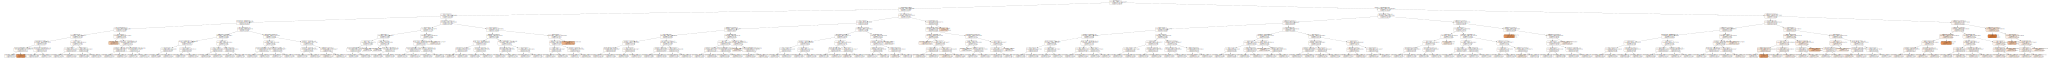

In [98]:
# Visualise the tree
dot_data = tree.export_graphviz(best_model_dt, out_file=None,
                                feature_names= dt_X.columns,
                                filled=True, rounded=True,
                                special_characters=True)
display(graphviz.Source(dot_data))

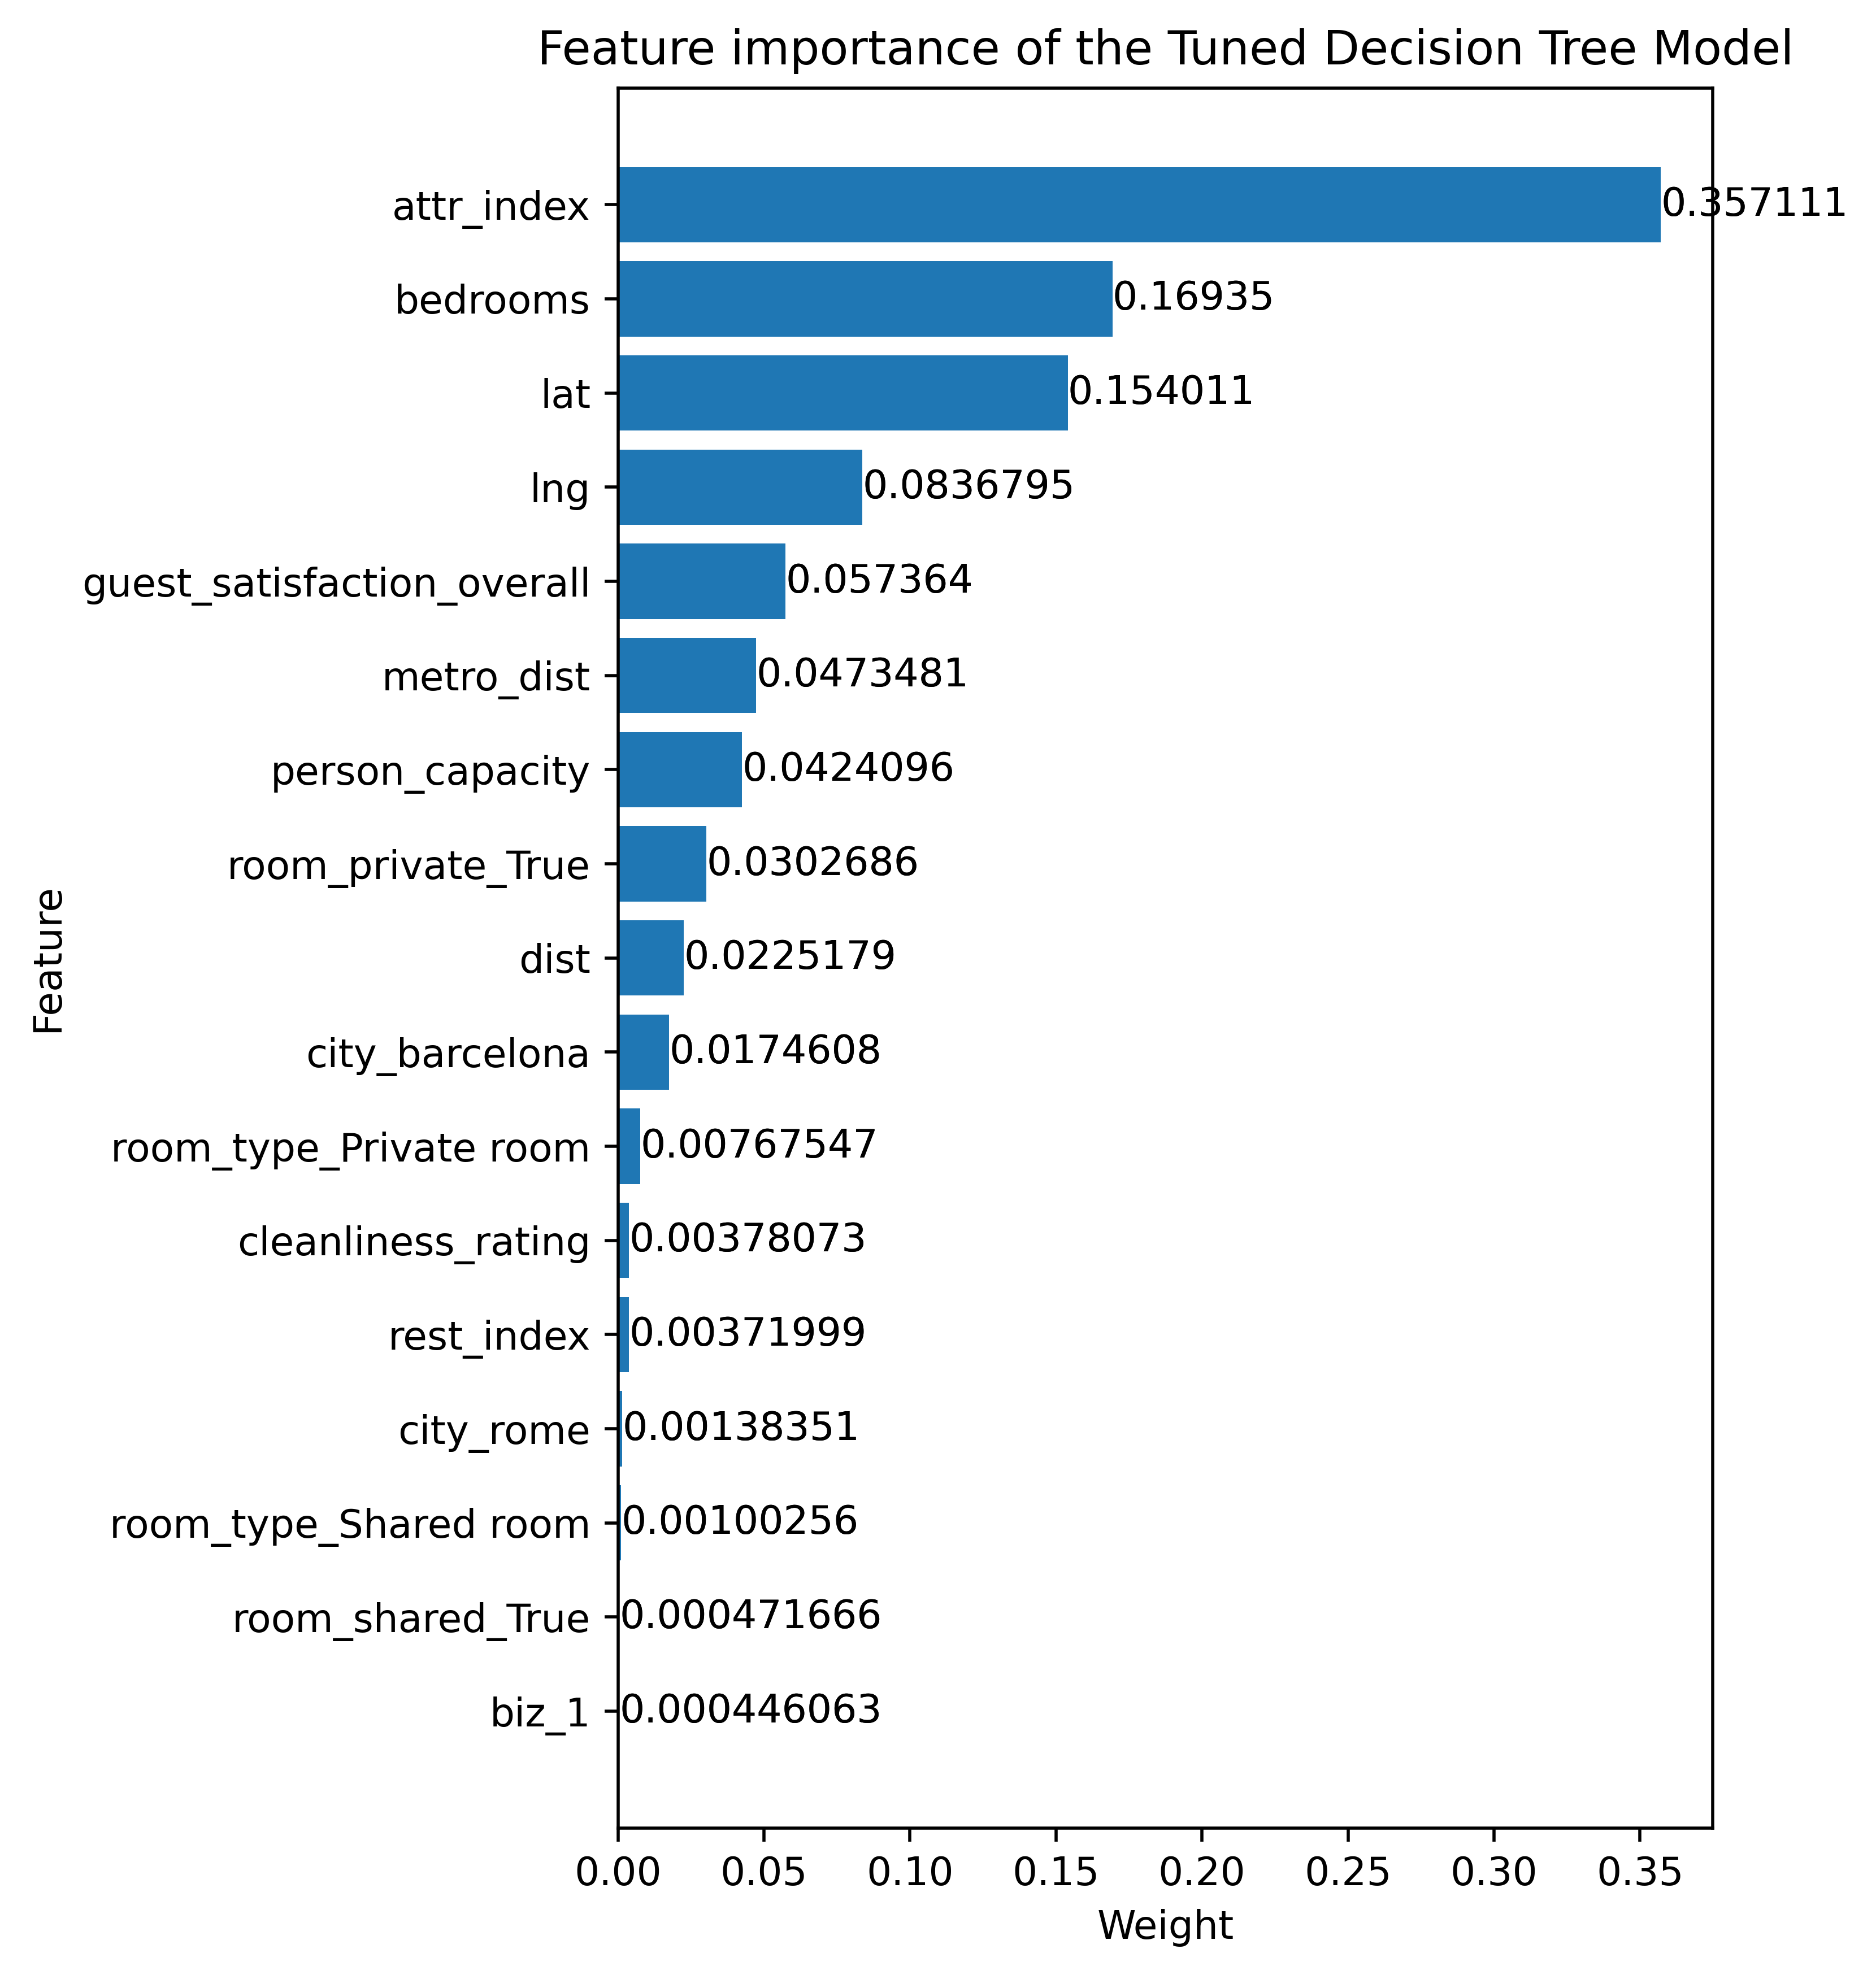

In [99]:
# Feature importance
feature_importance = pd.Series(
    best_model_dt.feature_importances_,
    index=best_model_dt.feature_names_in_,
).sort_values()

# Filter feature importance > 0
feature_importance = feature_importance[feature_importance > 0]

# Plot the feature importance
fig, ax = plt.subplots(figsize=(5, 8), dpi=500)
bars = ax.barh(feature_importance.index, feature_importance)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

# Add labels and title
plt.ylabel('Feature')
plt.xlabel('Weight')
plt.title('Feature importance of the Tuned Decision Tree Model')
plt.show()

The figure above illustrates the significance of various features in determining Airbnb prices in Europe. The most crucial feature, denoted as "attr_index," holds an important value of 0.357111. Following closely is the feature "bedrooms" with an importance value of 0.16935, and "lat" ranks third with a value of 0.154011. These three features account for more than 65% of the total feature importance in the decision tree model. Therefore, they play a pivotal role in influencing Airbnb prices in Europe.

Comparing the performance of the decision tree to the baseline model, both R2 values are negative and the baseline model and decision tree model are -0.02588 and -0.21567 respectively. This indicates that neither of the models is performing well in fitting the data. Therefore, it is advisable to consider implementing other machine learning models.


### **3.3 Random Forest**

We used the same set with the decision tree model. Random Forest algorithm exhibits reduced sensitivity to outliers and noisy data compared to other algorithms due to its ensemble nature, which involves averaging predictions from multiple decision trees. Hence, the target variable is the orginial price, not the log-transformed price.

In [100]:
# Identify the X and Y
rf_X = df_dt.drop(columns=["realSum"], axis = 1)
rf_Y = df_dt["realSum"]

In [101]:
# Separate the dataset into training/testing with percentage 70%/30%
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_Y, test_size=0.3, random_state=123)

print(f"Training on {len(rf_x_train)} observations", "\n"
      f"Testing on {len(rf_x_test)} observations")

Training on 36194 observations 
Testing on 15513 observations


In [102]:
# Set up the randome forest model
rf_model = RandomForestRegressor(random_state = 889)

# Set the hyper-parameters of the model
parameters = {
    'n_estimators': [50, 200, 300], 
    'max_features': [2, 4, 6, 8],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [0.1, 0.2]
}
# Perform grid search with cross validation = 5
rand_search = RandomizedSearchCV(rf_model, 
                                parameters,
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                n_iter=10)

In [103]:
# Train the model and find the best hyper-parameters
rand_search.fit(rf_x_train, rf_y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=889),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'max_features': [2, 4, 6, 8],
                                        'min_samples_leaf': [0.1, 0.2],
                                        'n_estimators': [50, 200, 300]},
                   scoring='neg_mean_squared_error')

In [104]:
# Identify the best model with the best hyper-parameters
best_parameters = rand_search.best_params_
print("Best Parameters:", best_parameters)
best_rf = rand_search.best_estimator_
print("Best Model:", best_rf)

Best Parameters: {'n_estimators': 200, 'min_samples_leaf': 0.1, 'max_features': 8, 'max_depth': 8}
Best Model: RandomForestRegressor(max_depth=8, max_features=8, min_samples_leaf=0.1,
                      n_estimators=200, random_state=889)


In [105]:
# Predict the test data and calculate the evaluation metrics
rf_y_pred = best_rf.predict(rf_x_test)
print("Random Forest" "\n", compute_metrics(rf_y_test, rf_y_pred))

Random Forest
 {'MAE': 112.81404713115101, 'MAPE': 46.14661819181847, 'R2': 0.1324371708132872, 'MSE': 106529.44616650078}


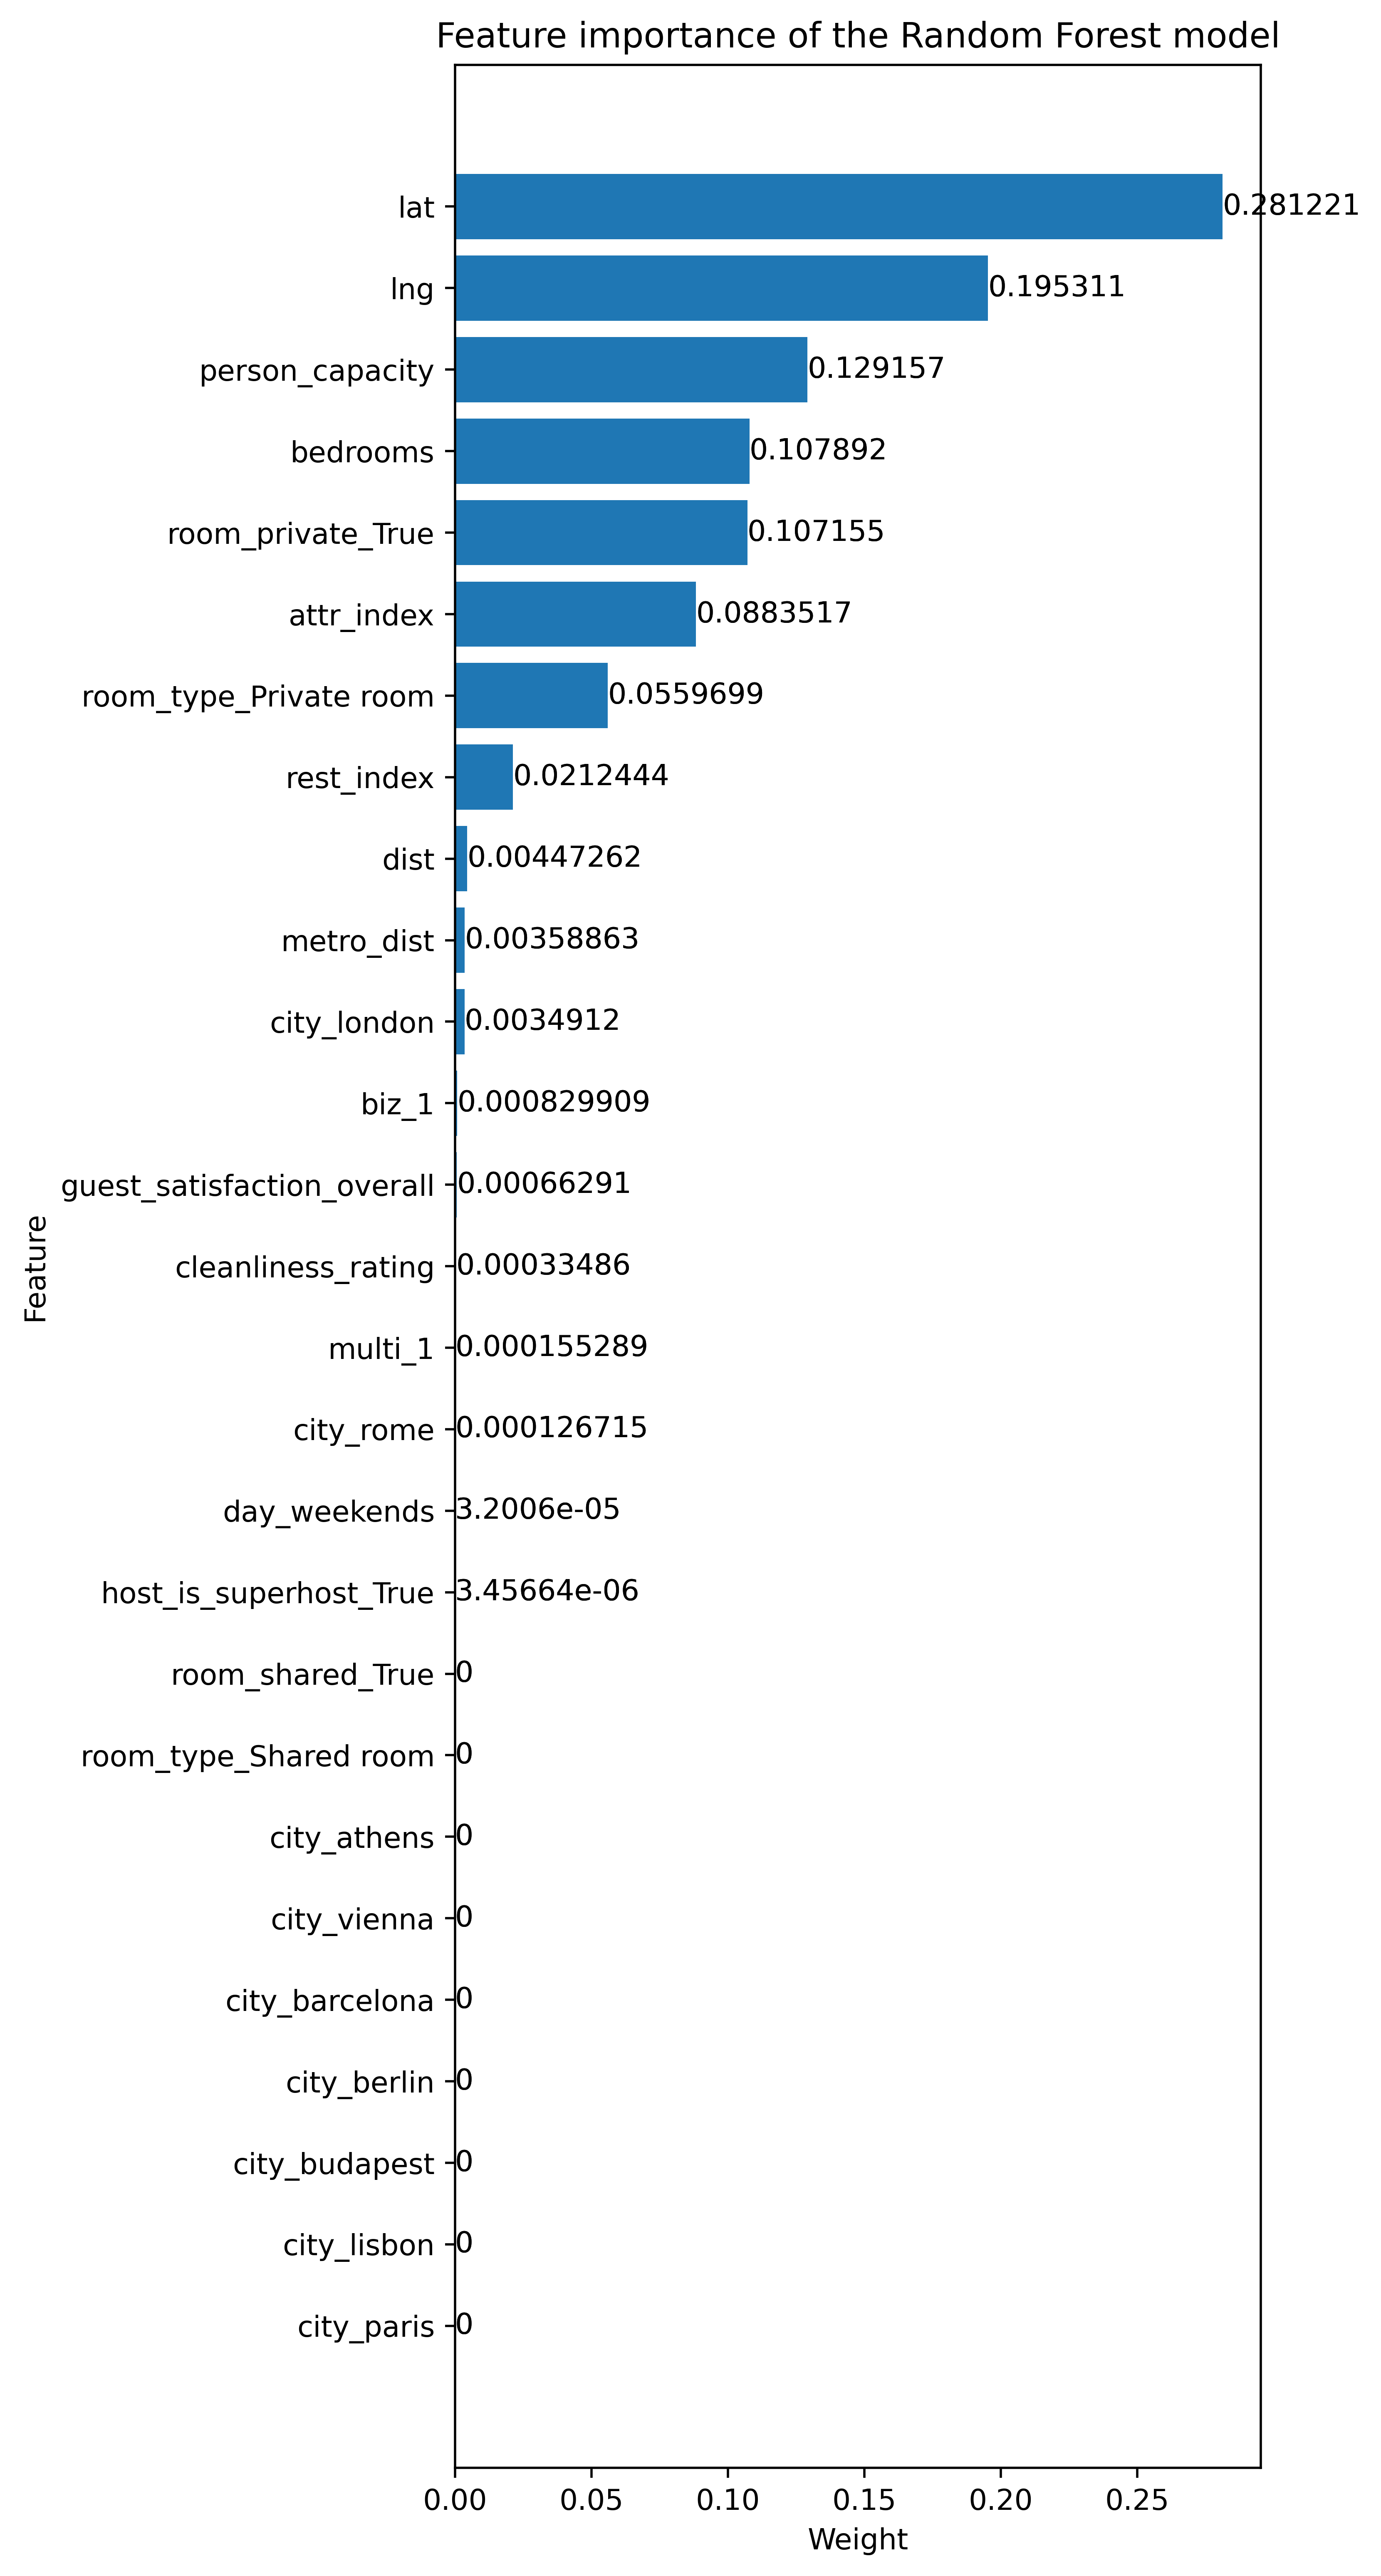

In [125]:
# Feature importance
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=best_rf.feature_names_in_,
).sort_values()

# Plot the feature importance
fig, ax = plt.subplots(figsize=(5, 15), dpi=500)
bars = ax.barh(feature_importance.index, feature_importance)
ax.set_xlabel('Weight')
ax.set_ylabel('Feature')
ax.set_title('Feature importance of the Random Forest model')

ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)


Compared to the decision tree, the random forest enables better identification of the importance of a feature, and also it is robust to outliers. The influence of outliers is mitigated via the average effect of multiple trees. Moreover, the random forest is well-suited for modeling high-dimensional data due to its ability to handle missing values, as well as its versatility in accommodating various data types, including continuous, categorical, and binary variables. Also, the random forest is strong enough to overcome the overfitting problems without pruning the trees due to the bootstrapping and ensemble scheme.

The above figure illustrates the significance of features in the random forest model. Among the features, "lat" holds the highest importance value of 0.281221, followed by "lng" and "person_capacity" with importance values of 0.195311 and 0.129157 respectively. These three features contribute to over 60% of the total feature importance in the random forest model. Furthermore, the prominence of latitude and longitude highlights their significant impact on airbnb prices.

Comparing the performance of the random forest model to the decision tree model and baseline model, a positive R2, which is 0.13243 indicates a relatively better fit and some degree of relationship between the random forest model and Airbnb prices. However, it is worth noting that the R2 value of 0.13243 still suggests room for improvement in accurately capturing the data patterns because the range of R2 is from 0 to 1, with values closer to 1 indicating a stronger fit between the model and the data.



### **3.4 XGBoost**

### 3.4.1 XGBoost with original target variable

In [107]:
# Identify the X and Y
xgb_prepared = df_dt.drop(columns=["realSum"], axis = 1)
xgb_labels = df_dt["realSum"]

In [108]:
# Split the data into training and testing sets
# These are the same training and test sets as used in Decision Tree and Random Forest models
X_train, X_test, y_train, y_test = train_test_split(xgb_prepared, xgb_labels, test_size=0.3, random_state=123)

In [109]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Create the XGBoost regressor
model = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
xgb_rand_search = RandomizedSearchCV(
    model, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error')

xgb_rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error')

In [110]:
# Identify the best model with the best hyper-parameters
best_parameters = xgb_rand_search.best_params_
print("Best Parameters:", best_parameters)
best_model_xgb = xgb_rand_search.best_estimator_
print("Best Model:", best_model_xgb)

Best Parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [111]:
# Make predictions
xgb_y_pred = best_model_xgb.predict(X_test)

print("XGBoost" "\n", compute_metrics(y_test, xgb_y_pred))

XGBoost
 {'MAE': 79.66720376178523, 'MAPE': 27.0753095001998, 'R2': 0.30863996552411155, 'MSE': 84893.21936880566}


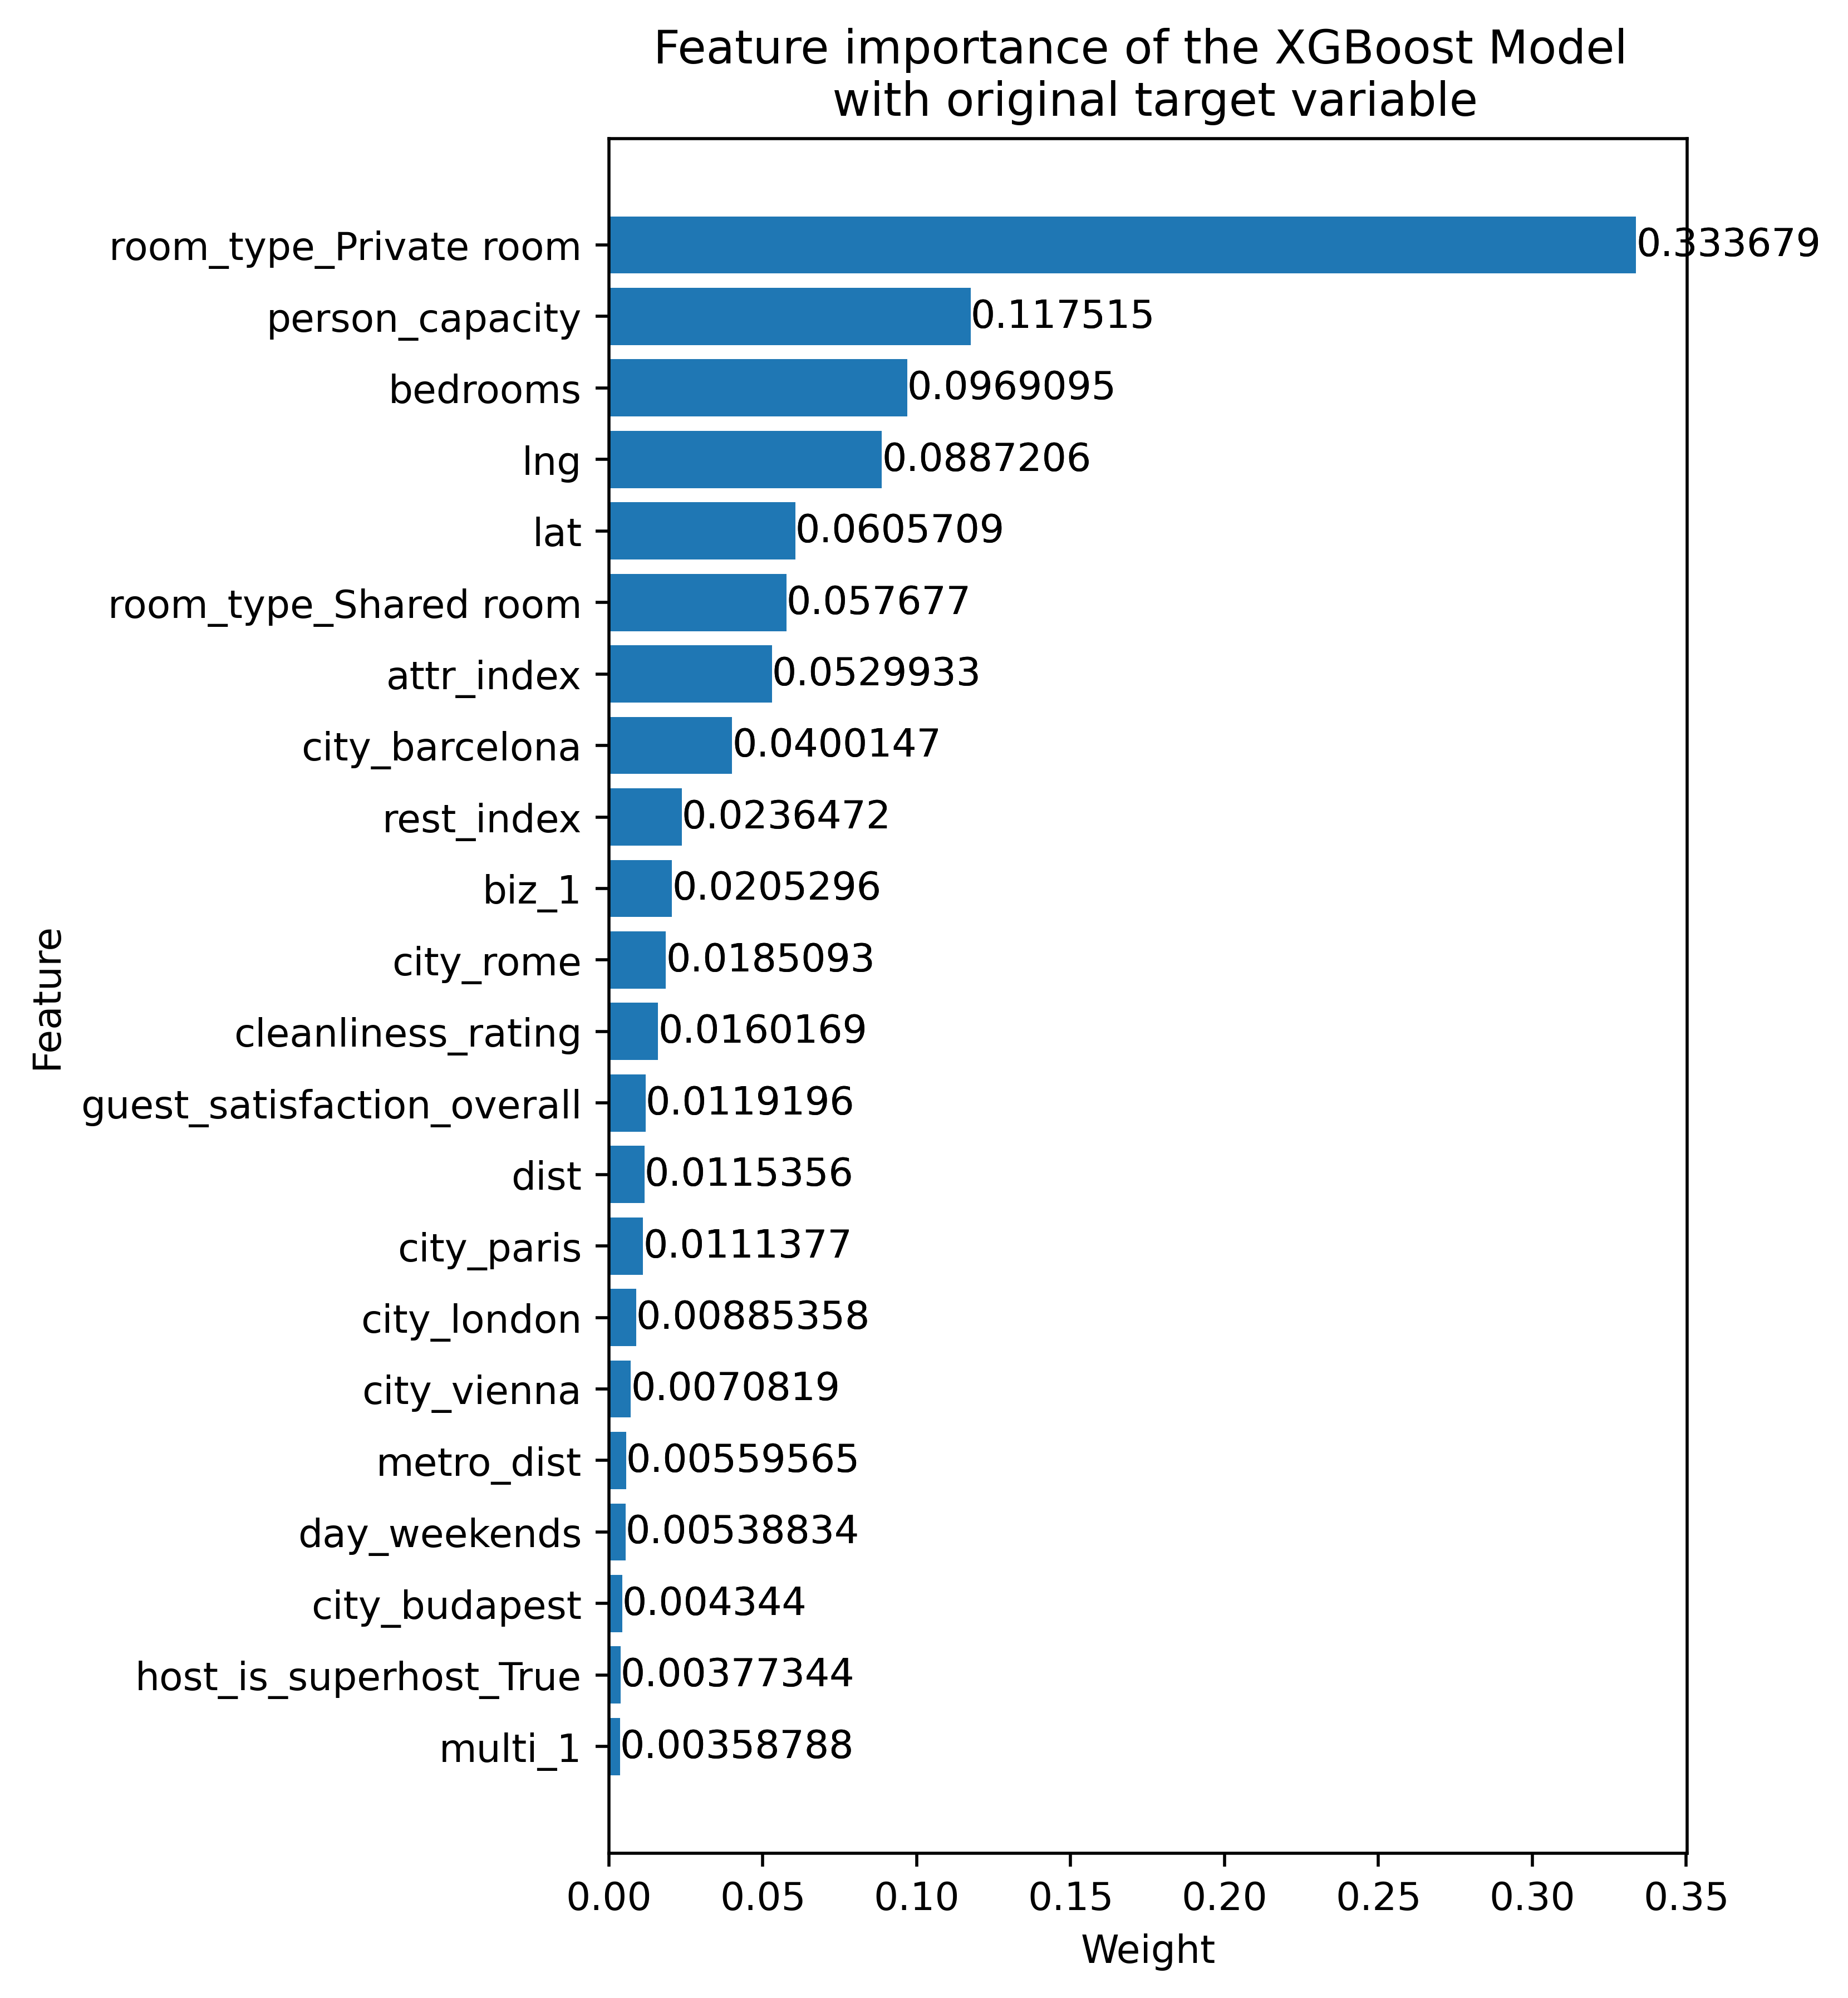

In [126]:
# Feature importance
feature_importance = pd.Series(
    best_model_xgb.feature_importances_,
    index=best_model_xgb.feature_names_in_,
).sort_values()

# Filter feature importance > 0
feature_importance = feature_importance[feature_importance > 0]

# Plot the feature importance
fig, ax = plt.subplots(figsize=(5, 8), dpi=500)
bars = ax.barh(feature_importance.index, feature_importance)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

# Add labels and title
plt.ylabel('Feature')
plt.xlabel('Weight')
plt.title('Feature importance of the XGBoost Model \n with original target variable')
plt.show()

### 3.4.2 XGBoost with log-transformed target variable

The presence of outliers in the context of boosting can be detrimental due to the construction of each subsequent tree based on the residuals or errors of the previous trees. Outliers tend to exhibit substantially larger residuals compared to non-outliers, consequently causing gradient boosting to allocate a disproportionate emphasis on these data points.

Therefore, it is worth to be considered whether handling the skewness in the target variable can improve the performance of XGBoost model or not. Instead of removing the outliers, we can try to log transform the target variable.

In [118]:
# Identify the X and Y
xgb_prepared = df_dt.drop(columns=["realSum"], axis = 1)
xgb_labels_2 = dfnew["log_realSum"]

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xgb_prepared, xgb_labels_2, test_size=0.3, random_state=123)

In [120]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Create the XGBoost regressor
model = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
xgb_rand_search = RandomizedSearchCV(
    model, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error')

xgb_rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error')

In [121]:
# Identify the best model with the best hyper-parameters
best_parameters = xgb_rand_search.best_params_
print("Best Parameters:", best_parameters)
best_model_xgb = xgb_rand_search.best_estimator_
print("Best Model:", best_model_xgb)

Best Parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [122]:
# Make predictions
xgb_y_pred = best_model_xgb.predict(X_test)

print("XGBoost with log transformation" "\n", compute_metrics(y_test, xgb_y_pred))

XGBoost with log transformation
 {'MAE': 0.21992140461653936, 'MAPE': 4.0224049304359, 'R2': 0.7397697644141197, 'MSE': 0.09305176779850542}


In [128]:
print('XGBoost with log transformation: \n ', compute_metrics(np.expm1(y_test), np.expm1(xgb_y_pred)))

XGBoost with log transformation: 
  {'MAE': 71.57325818999045, 'MAPE': 21.839515060513914, 'R2': 0.31075360190829926, 'MSE': 84633.68253086162}


From the result above, the MSE does not reduce significantly compared with the 1st XGBoost model's MSE. 

However, the MAE and MAPE and R2 of the 2nd XGBoost are all better, which indicates an overall better performance than the 1st XGBoost.

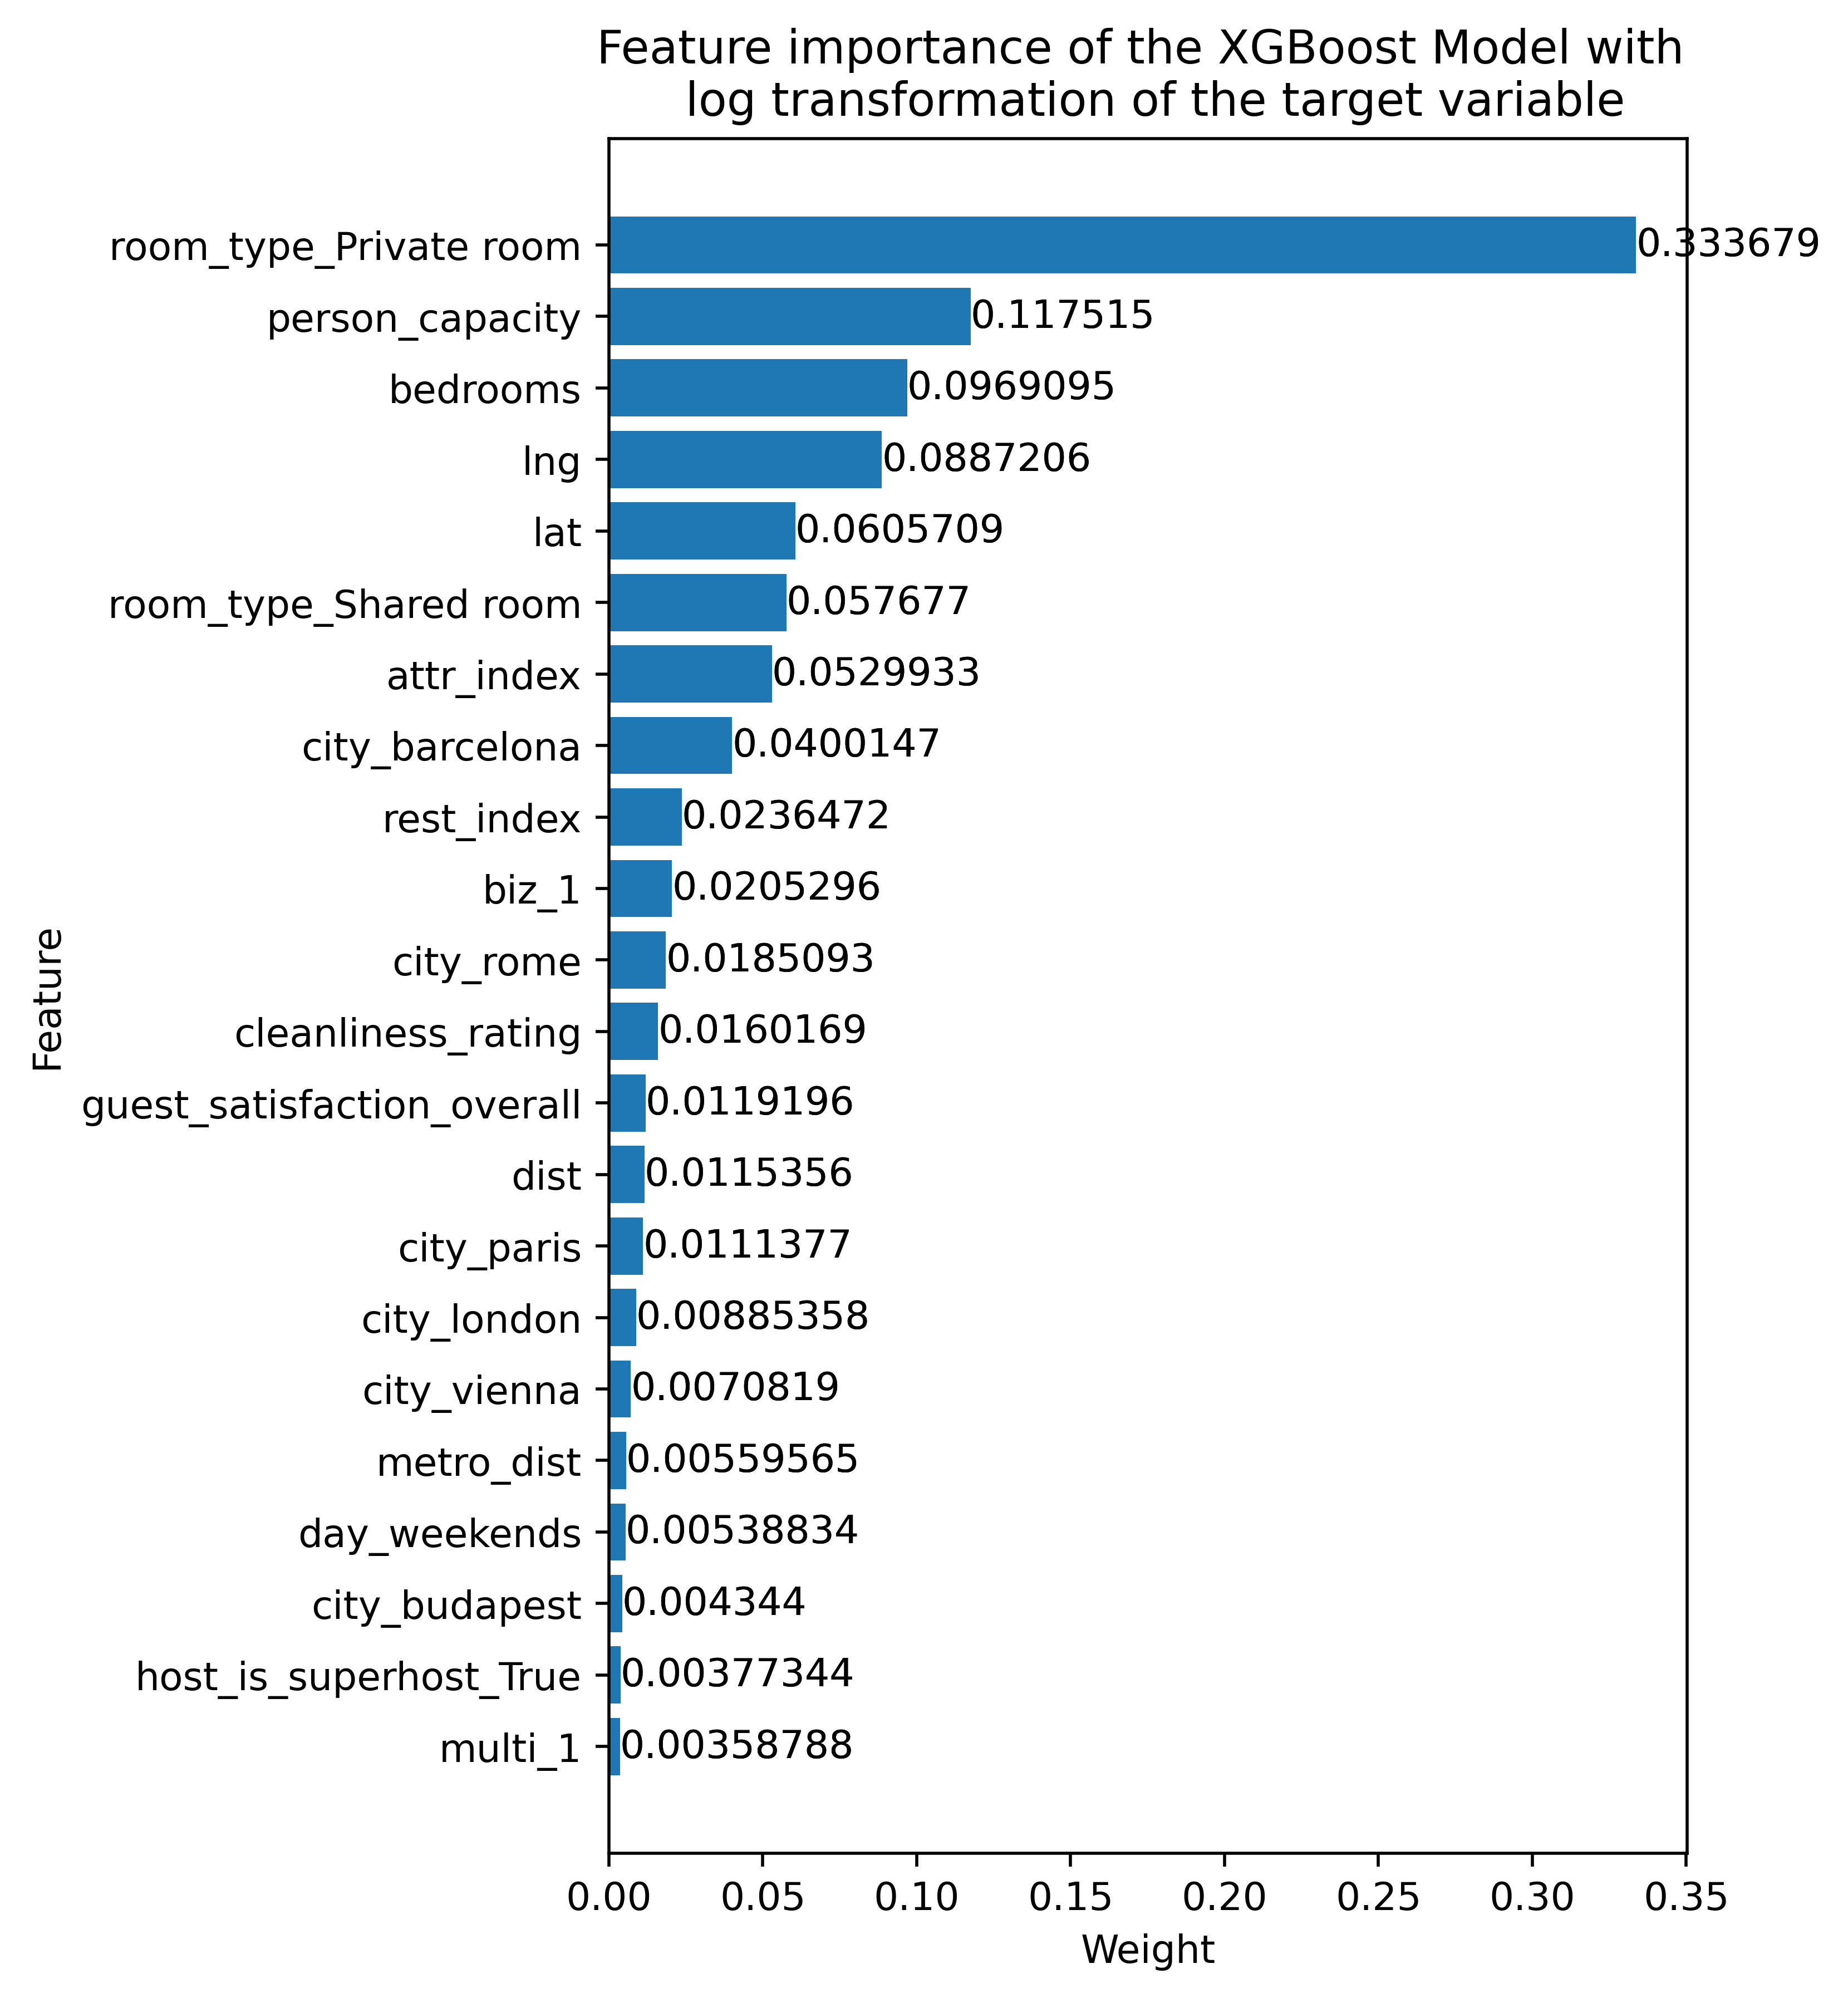

In [124]:
# Feature importance
feature_importance = pd.Series(
    best_model_xgb.feature_importances_,
    index=best_model_xgb.feature_names_in_,
).sort_values()

# Filter feature importance > 0
feature_importance = feature_importance[feature_importance > 0]

# Plot the feature importance
fig, ax = plt.subplots(figsize=(5, 8), dpi=500)
bars = ax.barh(feature_importance.index, feature_importance)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)

# Add labels and title
plt.ylabel('Feature')
plt.xlabel('Weight')
plt.title('Feature importance of the XGBoost Model with \n log transformation of the target variable')
plt.show()

### 3.4.3 XGBoost with original target variable and feature selection

Since there are features that have high correlation with the other, feature selection is considered when running the third XGBoost. We tried this method with the original price, not the price with log transformation.

In [4]:
# Reading datasets
df = pd.read_csv("./prep_data_ver2.csv")

In [5]:
df

room_type_Private room  room_type_Shared room  room_shared_True  \
0                           1                      0                 0   
1                           1                      0                 0   
2                           1                      0                 0   
3                           1                      0                 0   
4                           1                      0                 0   
...                       ...                    ...               ...   
51702                       0                      0                 0   
51703                       0                      0                 0   
51704                       0                      0                 0   
51705                       1                      0                 0   
51706                       1                      0                 0   

       room_private_True  host_is_superhost_True  city_athens  city_barcelona  \
0                      1                       0            0               0   
1                      1                       0            0               0   
2                      1                       0            0               0   
3                      1                       0            0               0   
4                      1                       1            0               0   
...                  ...                     ...          ...             ...   
51702                  0                       0            0               0   
51703                  0                       0            0               0   
51704                  0                       0            0               0   
51705                  1                       0            0               0   
51706                  1                       1            0               0   

       city_berlin  city_budapest  city_lisbon  ...      dist  metro_dist  \
0                0              0            0  ...  0.765183    2.165278   
1                0              0            0  ... -1.129133   -0.515301   
2                0              0            0  ...  1.068196    3.461575   
3                0              0            0  ... -1.172382   -0.281655   
4                0              0            0  ... -1.105593   -0.422892   
...            ...            ...          ...  ...       ...         ...   
51702            0              0            0  ... -1.111675   -0.636461   
51703            0              0            0  ... -0.994695   -0.676796   
51704            0              0            0  ... -0.917893   -0.558267   
51705            0              0            0  ... -0.061487   -0.459322   
51706            0              0            0  ... -0.805151   -0.233839   

       attr_index  attr_index_norm  rest_index  rest_index_norm       lng  \
0       -0.958896        -0.943841   -1.061632        -0.895292 -0.257191   
1        1.499307         2.038911    0.422610         1.997130 -0.257767   
2       -0.974088        -0.962275   -1.067390        -0.906512 -0.250106   
3        0.885725         1.294398    0.498431         2.144886 -0.258367   
4        1.150718         1.615938    0.378476         1.911124 -0.257720   
...           ...              ...         ...              ...       ...   
51702   -0.332819         0.233319   -0.377775        -0.684208  0.913640   
51703   -0.397033         0.127939   -0.571731        -0.815312  0.913773   
51704   -0.556750        -0.134165   -0.692006        -0.896610  0.914281   
51705   -0.822985        -0.571070   -0.940508        -1.064583  0.909721   
51706   -0.639611        -0.270143   -0.806582        -0.974057  0.914789   

            lat  log_realSum     realSum  
0      1.285258     5.273172  194.033698  
1      1.276990     5.844257  344.245776  
2      1.274458     5.580112  264.101422  
3      1.277430     6.074264  433.529398  
4      1.277135     6.187346  485.552926  
...         ...          ...         

In [7]:
# Replace logtransformed price by original price
df = df.drop(columns = ["log_realSum"], axis = 1)

In [8]:
# Seperate features and labels
xgb_prepared = df.drop(columns=["realSum"], axis = 1)
xgb_labels = df["realSum"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xgb_prepared, xgb_labels, test_size=0.3, random_state=42)

In [13]:
# Create and train the XGBoost regressor
model = XGBRegressor(objective='reg:squarederror')  # Use 'reg:squarederror' for regression
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the performance using mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Get feature importance scores
importance_scores = model.feature_importances_
feature_names = X_train.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]


Mean Squared Error: 62147.60072867042


In [14]:
from sklearn.metrics import mean_squared_error

mse_results = []  # Store MSE values for different values of k
k_values = range(1, len(feature_names) + 1)  # Range of k values to consider

for k in k_values:
    # Select top k features based on importance scores
    selected_features = sorted_feature_names[:k]

    # Seperate selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Create and train the XGBoost regressor with selected features
    model_selected = XGBRegressor(objective='reg:squarederror')
    model_selected.fit(X_train_selected, y_train)

    # Make predictions using the model with selected features
    predictions_selected = model_selected.predict(X_test_selected)

    # Calculate mean squared error (MSE) with selected features
    mse_selected = mean_squared_error(y_test, predictions_selected)

    # Store the MSE value
    mse_results.append(mse_selected)

# Find the index with the minimum MSE value
optimal_k_index = mse_results.index(min(mse_results))
optimal_k = k_values[optimal_k_index]

print("MSE Results:", mse_results)
print("Optimal k:", optimal_k)


MSE Results: [113638.67087264221, 92214.58616793173, 71393.52611852884, 71142.44957812, 65029.8748663478, 69189.62851349638, 68420.05375660167, 66314.50002925632, 57158.96955300313, 60182.8606722663, 57954.176075222786, 57142.10594781958, 54884.70514478238, 58516.63074568859, 58451.16800191339, 59766.28876125787, 61625.95662419492, 62906.36065637015, 61938.34820628451, 63594.41107412825, 62207.135983757296, 59354.215232782146, 59354.215232782146, 59354.215232782146, 63843.75609982737, 66449.05293215955, 66449.05293215955, 66449.05293215955, 66449.05293215955]
Optimal k: 13


In [15]:
# Select optimal k values based on mse
k = optimal_k  # Number of top features to select
selected_features = sorted_feature_names[:k]
print("Selected Features:", selected_features)

Selected Features: ['bedrooms', 'attr_index_norm', 'lat', 'room_type_Private room', 'city_barcelona', 'lng', 'biz_1', 'attr_index', 'person_capacity', 'dist', 'cleanliness_rating', 'rest_index_norm', 'host_is_superhost_True']


In [16]:
# Refit the model based on the optimal k value
# Seperate selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and train the XGBoost regressor with selected features
model_selected = XGBRegressor(objective='reg:squarederror')
model_selected.fit(X_train_selected, y_train)

# Make predictions using the model with selected features
predictions_selected = model_selected.predict(X_test_selected)

# Evaluate the performance using mean squared error (MSE) with selected features
mse_selected = mean_squared_error(y_test, predictions_selected)
print("Mean Squared Error (Selected Features):", mse_selected)
# Calculate R-squared
r_squared = r2_score(y_test, predictions_selected)

print("R-squared:", r_squared)



Mean Squared Error (Selected Features): 54884.70514478238
R-squared: 0.5537396206135121


In [17]:
mae = mean_absolute_error(y_test, predictions_selected)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 72.30689732310069


In [18]:
# Define the parameter grid for randomize search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 500],
}

# Create the XGBoost regressor
model = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
predictions = best_model.predict(X_test_selected)


In [24]:
# # Evaluate the performance using mean squared error (MSE)
# mse = mean_squared_error(y_test, predictions)
# print("Mean Squared Error:", mse)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Make predictions
# xgb_y_pred = best_model.predict(X_test)

In [26]:
# Seperate selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and train the XGBoost regressor with selected features
model_selected = XGBRegressor(objective='reg:squarederror')
model_selected.fit(X_train_selected, y_train)

# Make predictions using the model with selected features
predictions_selected = model_selected.predict(X_test_selected)

# Evaluate the performance using mean squared error (MSE) with selected features
mse_selected = mean_squared_error(y_test, predictions_selected)
print("Mean Squared Error (Selected Features):", mse_selected)
print("XGBoost with feature selection" "\n", compute_metrics(y_test, predictions_selected))


Mean Squared Error (Selected Features): 54884.70514478238
XGBoost with feature selection
 {'MAE': 72.30689732310069, 'MAPE': 26.16734074745834, 'R2': 0.5537396206135121, 'MSE': 54884.70514478238}


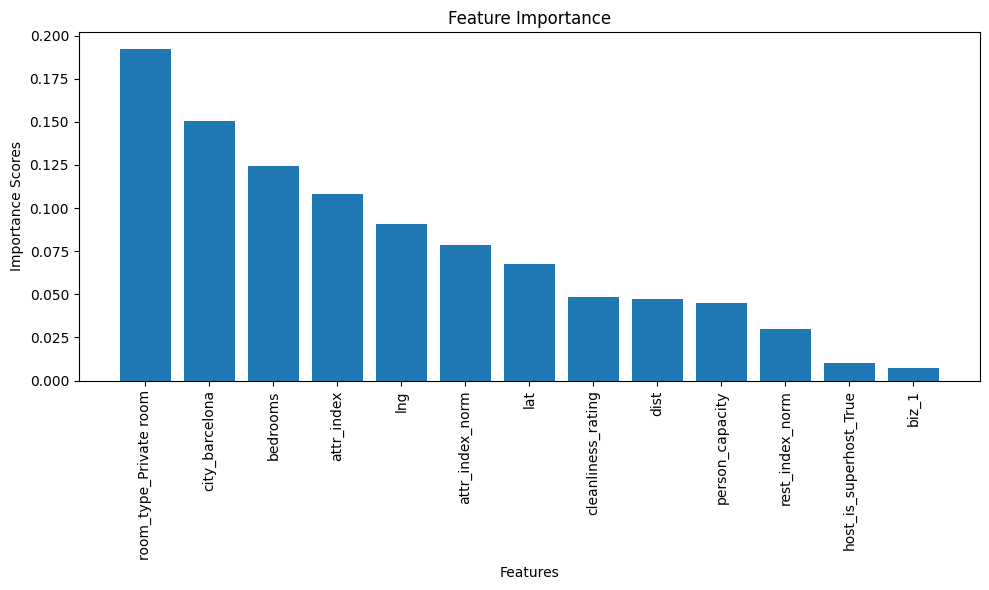

In [25]:
# Visualise feature importance
importance_scores = model_selected.feature_importances_
feature_names = X_train_selected.columns

# Sort the feature importance scores and feature names in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_scores)), sorted_scores)
plt.xticks(range(len(importance_scores)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance')
plt.tight_layout()  # Adjust spacing
plt.show()

####  **Model performance**
The technique of feature selection is applied based on the feature importance generated by XGBoost. An iteration is used to find the optimum number of features using Mean Squared Error (MSE) as the metric. The optimum k is 13 and the corresponding MSE is 54884.70 and the R-squared value is 0.5537.

####  **Business insights**
From a business perspective, the analysis provides valuable insights into the factors that significantly impact accommodation prices. Understanding these influential features can assist businesses in several ways.

Firstly, it allows accommodation providers to set competitive pricing strategies by considering the factors that potential guests value the most. For example, according to the chart 'Feature Importance' we can see that  accommodations with private rooms, a higher number of bedrooms and being close to attractions may command a premium price. Additionally, businesses can focus on enhancing specific attributes or amenities to increase guest satisfaction and overall value perception.

Furthermore, the analysis can help businesses identify potential market opportunities. For instance, if the 'city_barcelona' feature has a significant impact on prices, it suggests that accommodations in Barcelona may have higher market demand or specific characteristics that attract guests, enabling businesses to tailor their marketing and operational strategies accordingly.

### **3.5 Linear Regression**

In [ ]:
df = pd.read_csv("prep_data_ver2.csv")
df.head()

room_type_Private room  room_type_Shared room  room_shared_True  \
0                       1                      0                 0   
1                       1                      0                 0   
2                       1                      0                 0   
3                       1                      0                 0   
4                       1                      0                 0   

   room_private_True  host_is_superhost_True  city_athens  city_barcelona  \
0                  1                       0            0               0   
1                  1                       0            0               0   
2                  1                       0            0               0   
3                  1                       0            0               0   
4                  1                       1            0               0   

   city_berlin  city_budapest  city_lisbon  ...      dist  metro_dist  \
0            0              0            0  ...  0.765183    2.165278   
1            0              0            0  ... -1.129133   -0.515301   
2            0              0            0  ...  1.068196    3.461575   
3            0              0            0  ... -1.172382   -0.281655   
4            0              0            0  ... -1.105593   -0.422892   

   attr_index  attr_index_norm  rest_index  rest_index_norm       lng  \
0   -0.958896        -0.943841   -1.061632        -0.895292 -0.257191   
1    1.499307         2.038911    0.422610         1.997130 -0.257767   
2   -0.974088        -0.962275   -1.067390        -0.906512 -0.250106   
3    0.885725         1.294398    0.498431         2.144886 -0.258367   
4    1.150718         1.615938    0.378476         1.911124 -0.257720   

        lat  log_realSum     realSum  
0  1.285258     5.273172  194.033698  
1  1.276990     5.844257  344.245776  
2  1.274458     5.580112  264.101422  
3  1.277430     6.074264  433.529398  
4  1.277135     6.187346  485.552926  

[5 rows x 31 columns]

Split train test and validation dataset

In [ ]:
#### Set X and y dataset separately
X = df.drop(["log_realSum", "realSum"], axis = 1)
y = df["log_realSum"]
y_real = df["realSum"]
print(X.shape, y.shape, y_real.shape)

(51707, 29) (51707,) (51707,)


In [ ]:
#### Split train, test, validation dataset
# split train, other dataset from original X and y (RealSum)
X_train, X_other, y_train_real, y_other = train_test_split(
    X, y_real, test_size=0.3, random_state=11
    )
# split test, validation dataset from X_other and y_other
X_test, X_valid, y_test_real, y_valid_real = train_test_split(
    X_other, y_other, test_size=0.3, random_state=11
    )
# split train, other dataset from original X and y (log_RealSum)
X_train, X_other, y_train, y_other = train_test_split(
    X, y, test_size=0.3, random_state=11
    )
# split test, validation dataset from X_other and y_other
X_test, X_valid, y_test, y_valid = train_test_split(
    X_other, y_other, test_size=0.3, random_state=11
    )
# check the shape
print(X_train.shape, X_test.shape, X_valid.shape)

(36194, 29) (10859, 29) (4654, 29)


### 3.5.1 Use VIF (Variance Inflation Factor) to identify features that have multicollinearity problem

#### 3.5.1.1 Check the VIF values for all features and filter those to be eliminated

In [ ]:
#### Calculate VIF of each features
# create dataframe
df_vif = pd.DataFrame()
df_vif["Feature"] = X.columns
df_vif["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print(df_vif)

c:\Users\xiaoc\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Feature           VIF
0       room_type_Private room           inf
1        room_type_Shared room  4.740631e+12
2             room_shared_True  4.740631e+12
3            room_private_True           inf
4       host_is_superhost_True  1.540692e+00
5                  city_athens  1.082605e+04
6               city_barcelona  1.545343e+03
7                  city_berlin  2.100324e+03
8                city_budapest  7.008113e+03
9                  city_lisbon  2.446576e+04
10                 city_london  3.241932e+03
11                  city_paris  1.146090e+03
12                   city_rome  1.363064e+03
13                 city_vienna  3.973951e+03
14                day_weekends  2.050728e+00
15                     multi_1  1.939420e+00
16                       biz_1  2.389088e+00
17             person_capacity  2.055944e+00
18          cleanliness_rating  2.095838e+00
19  guest_satisfaction_overall  2.179731e+00
20                    bedrooms  1.575793e+00
21        

In [ ]:
#### Eliminate features with high VIF values
name_remove = df_vif.loc[df_vif["VIF"] > 5, "Feature"]
name_remove

0     room_type_Private room
1      room_type_Shared room
2           room_shared_True
3          room_private_True
5                city_athens
6             city_barcelona
7                city_berlin
8              city_budapest
9                city_lisbon
10               city_london
11                city_paris
12                 city_rome
13               city_vienna
23                attr_index
24           attr_index_norm
25                rest_index
26           rest_index_norm
27                       lng
28                       lat
Name: Feature, dtype: object

#### 3.5.1.2 Check the VIF values for the selected features

**Strategy 1: keep coordinates remove cities**

In [ ]:
#### Calculate VIF of each features
# In strategy 1: cities would be removed and coordinates would be kept
# create dataframe
df_vif_left = pd.DataFrame()
# create the list of feature names to be excluded - combined with the manually eliminating process based on the feature descriptions
l_exclude = ["bedrooms", "dist", "attr_index", "rest_index", "room_type_Private room", "room_type_Shared room", 
             'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']
X_left = X.drop(l_exclude, axis = 1)

df_vif_left["Feature"] = X_left.columns
df_vif_left["VIF"] = [vif(X_left.values, i) for i in range(X_left.shape[1])]
print(df_vif_left)

                       Feature       VIF
0             room_shared_True  1.016782
1            room_private_True  2.025890
2       host_is_superhost_True  1.410132
3                 day_weekends  1.569906
4                      multi_1  1.524051
5                        biz_1  1.600705
6              person_capacity  1.350855
7           cleanliness_rating  2.084170
8   guest_satisfaction_overall  2.165143
9                   metro_dist  1.145528
10             attr_index_norm  1.791264
11             rest_index_norm  1.422792
12                         lng  1.169766
13                         lat  1.433164


**Strategy 2: keep cities remove coordinates**

In [ ]:
#### Calculate VIF of each features
# In strategy 2: coordinates would be removed and cities would be kept
# create dataframe
df_vif_left = pd.DataFrame()
# create the list of feature names to be excluded - combined with the manually eliminating process based on the feature descriptions
l_exclude = ["bedrooms", "dist", "attr_index", "rest_index", "room_type_Private room", "room_type_Shared room", 
             'lat', 'lng']
X_left = X.drop(l_exclude, axis = 1)

df_vif_left["Feature"] = X_left.columns
df_vif_left["VIF"] = [vif(X_left.values, i) for i in range(X_left.shape[1])]
print(df_vif_left)

                       Feature       VIF
0             room_shared_True  1.025248
1            room_private_True  2.448345
2       host_is_superhost_True  1.518367
3                  city_athens  1.625613
4               city_barcelona  1.358873
5                  city_berlin  1.215356
6                city_budapest  1.413766
7                  city_lisbon  1.798951
8                  city_london  2.781167
9                   city_paris  1.635152
10                   city_rome  1.875869
11                 city_vienna  1.415708
12                day_weekends  1.974254
13                     multi_1  1.904572
14                       biz_1  2.322038
15             person_capacity  1.386895
16          cleanliness_rating  2.091911
17  guest_satisfaction_overall  2.173725
18                  metro_dist  1.218671
19             attr_index_norm  2.679472
20             rest_index_norm  3.216933


It can be concluded that both removing cities removing coordinates help reduce feature colinearity.

### 3.5.2 Implement Linear regression models
For the basic models, they don't perform cross validations so only the train and test datasets are used.

#### 3.5.2.1 Linear Regression model with all features

In [ ]:
#### Check dependent variables
print(y_test, y_test_real)

49591    5.970179
32350    5.929925
34383    5.731973
23304    5.930550
32066    5.574835
           ...   
47293    5.220327
25944    5.690907
12543    5.890580
14827    4.694398
50822    5.398981
Name: log_realSum, Length: 10859, dtype: float64 49591    390.575696
32350    375.126414
34383    307.577593
23304    375.361603
32066    262.706084
            ...    
47293    183.994576
25944    295.162163
12543    360.615126
14827    108.332942
50822    220.180913
Name: realSum, Length: 10859, dtype: float64


In [ ]:
#### Fit the basic linear model with log-transformation
linear_m = LinearRegression()
linear_m.fit(X_train, y_train)
y_pred_linear = linear_m.predict(X_test)

#### Fit the basic linear model without log-transformation
linear_m_real = LinearRegression()
linear_m_real.fit(X_train, y_train_real)
y_pred_linear_real = linear_m_real.predict(X_test)

In [ ]:
print('Linear Regression with Log-transformation on y after transformed back: \n ', compute_metrics(np.expm1(y_test), np.expm1(y_pred_linear)))

Linear Regression with Log-transformation on y after transformed back: 
  {'MAE': 75.55395149788508, 'MAPE': 25.71891283864105, 'R2': 0.394876193876906, 'MSE': 43048.831020270976}


In [ ]:
print('Linear Regression without Log-transformation: \n ', compute_metrics( y_test_real, y_pred_linear_real))

Linear Regression without Log-transformation: 
  {'MAE': 95.59222108505651, 'MAPE': 39.30052167363225, 'R2': 0.3513076190492824, 'MSE': 46148.322721919314}


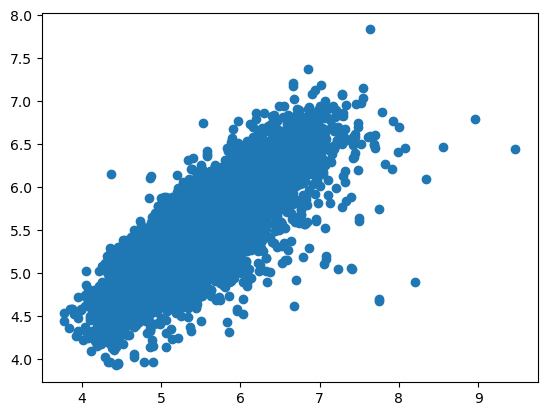

In [ ]:
plt.scatter(y_test, y_pred_linear)
plt.show()

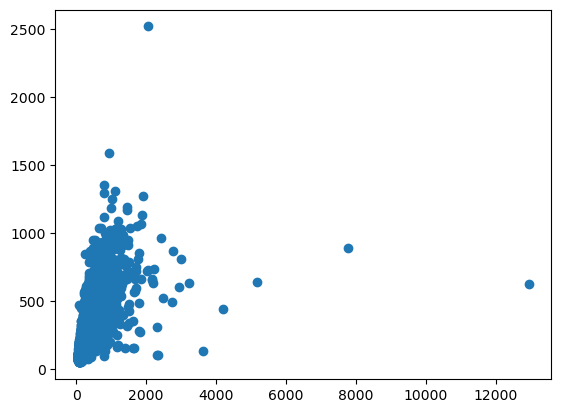

In [ ]:
plt.scatter(y_test_real, np.expm1(y_pred_linear))
plt.show()

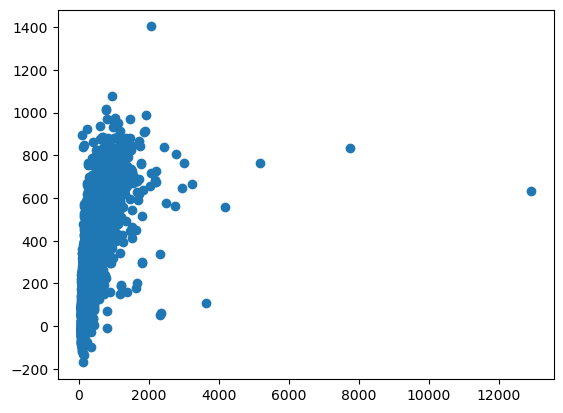

In [ ]:
plt.scatter(y_test_real, y_pred_linear_real)
plt.show()

C:\Users\xiaoc\AppData\Local\Temp\ipykernel_25076\630913763.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)


[Text(0, 0, 'room_type_Shared room'),
 Text(1, 0, 'room_private_True'),
 Text(2, 0, 'city_athens'),
 Text(3, 0, 'city_budapest'),
 Text(4, 0, 'city_vienna'),
 Text(5, 0, 'city_berlin'),
 Text(6, 0, 'city_rome'),
 Text(7, 0, 'lat'),
 Text(8, 0, 'person_capacity'),
 Text(9, 0, 'biz_1'),
 Text(10, 0, 'bedrooms'),
 Text(11, 0, 'attr_index_norm'),
 Text(12, 0, 'multi_1'),
 Text(13, 0, 'rest_index'),
 Text(14, 0, 'cleanliness_rating'),
 Text(15, 0, 'day_weekends'),
 Text(16, 0, 'rest_index_norm'),
 Text(17, 0, 'host_is_superhost_True'),
 Text(18, 0, 'attr_index'),
 Text(19, 0, 'guest_satisfaction_overall'),
 Text(20, 0, 'metro_dist'),
 Text(21, 0, 'dist'),
 Text(22, 0, 'city_barcelona'),
 Text(23, 0, 'city_paris'),
 Text(24, 0, 'city_london'),
 Text(25, 0, 'lng'),
 Text(26, 0, 'city_lisbon'),
 Text(27, 0, 'room_type_Private room'),
 Text(28, 0, 'room_shared_True')]

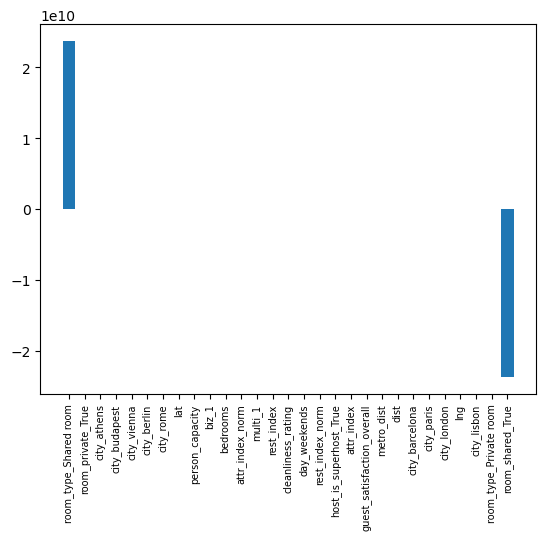

In [ ]:
#### Show the coefficients
# Create a dataframe of coefficient names and values
coe_linear = pd.DataFrame()
coe_linear["Feature"] = linear_m.feature_names_in_
coe_linear["Value"] = linear_m.coef_
# Sort the coefficients
coe_linear = coe_linear.sort_values(by = ["Value"], ascending = False)
# Visualise the coefficients
fig, ax = plt.subplots()
ax.bar(coe_linear["Feature"], coe_linear["Value"])
ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)

#[i+": "+j.astype(str) for i, j in zip(linear_m.feature_names_in_, linear_m.coef_)]

The first linear model is trained on all features, and there are two features that have much higher coefficients than others. It should also be noted that model 1 without log- transformation on response variables (MAE 95.6, MAPE 39.3, MSE 46148.3, R-square 0.351) performed worse than the one on the log-transformed data (MAE 75.6, MAPE 25.7, MSE 43048.8, R- square 0.395). This result is aligned with the insight concluded from the previous visualisations. 

We decided that the group of linear regression models would all be trained and evaluated on the log-transformed response variables.

#### 3.5.2.2 Linear regression model without collinearity data.
According to the correlation matrix implemented at the data preprocessing stage, it can be inferred that many numerical features have high correlations with the other.

To reduce the model bias, features that may have high collinearities to other features are eliminated.

**Strategy 1: keep coordinates remove cities**

In [ ]:
#### Fit the basic linear model after removing the features that have collinearity or are hard to interpret
# according to the correlation matrix, the following features will be removed:
# In strategy 1: cities would be removed and coordinates would be kept
l_remove = ["bedrooms", "dist", "attr_index", "rest_index", "room_type_Private room", "room_type_Shared room", 
             'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']
X_train_remove = X_train.drop(columns = l_remove, axis = 1)
X_test_remove = X_test.drop(columns = l_remove, axis = 1)
X_train_remove.shape

(36194, 14)

In [ ]:
#### Fit the basic linear model
linear_m_remove = LinearRegression()
linear_m_remove.fit(X_train_remove, y_train)
y_pred_linear_remove = linear_m_remove.predict(X_test_remove)

In [ ]:
print('Linear Regression with Log-transformation on coordinates: \n ', compute_metrics(np.expm1(y_test), np.expm1(y_pred_linear_remove)))

Linear Regression with Log-transformation on coordinates: 
  {'MAE': 89.26654132101547, 'MAPE': 30.632513905206686, 'R2': 0.3033765617430133, 'MSE': 49558.16375894634}


C:\Users\xiaoc\AppData\Local\Temp\ipykernel_25076\3821275670.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)


[Text(0, 0, 'lat'),
 Text(1, 0, 'person_capacity'),
 Text(2, 0, 'attr_index_norm'),
 Text(3, 0, 'cleanliness_rating'),
 Text(4, 0, 'rest_index_norm'),
 Text(5, 0, 'biz_1'),
 Text(6, 0, 'day_weekends'),
 Text(7, 0, 'multi_1'),
 Text(8, 0, 'guest_satisfaction_overall'),
 Text(9, 0, 'host_is_superhost_True'),
 Text(10, 0, 'metro_dist'),
 Text(11, 0, 'lng'),
 Text(12, 0, 'room_private_True'),
 Text(13, 0, 'room_shared_True')]

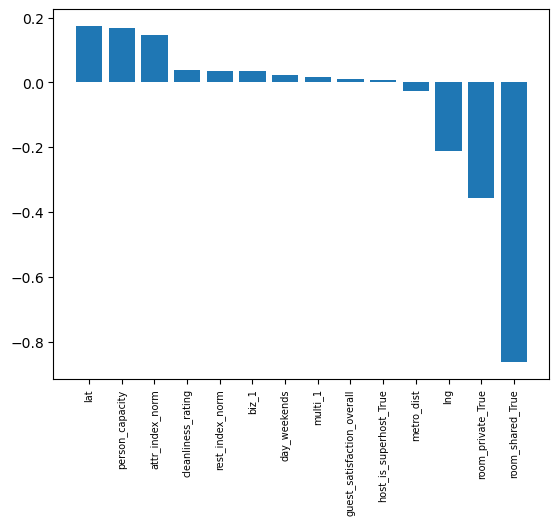

In [ ]:
#### Show the coefficients
coe_linear = pd.DataFrame()
coe_linear["Feature"] = linear_m_remove.feature_names_in_
coe_linear["Value"] = linear_m_remove.coef_
# Sort the coefficients
coe_linear = coe_linear.sort_values(by = ["Value"], ascending = False)
# Visualise the coefficients
fig, ax = plt.subplots()
ax.bar(coe_linear["Feature"], coe_linear["Value"])
ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)

#[i+": "+j.astype(str) for i, j in zip(linear_m_remove.feature_names_in_, linear_m_remove.coef_)]

**Strategy 2: keep cities remove coordinates**

In [ ]:
#### Fit the basic linear model after removing the features that have collinearity or are hard to interpret
# according to the correlation matrix, the following features will be removed:
# In strategy 2: coordinates would be removed and cities would be kept
l_remove = ["bedrooms", "dist", "attr_index", "rest_index", "room_type_Private room", "room_type_Shared room", 
             'lat', 'lng']
X_train_remove = X_train.drop(columns = l_remove, axis = 1)
X_test_remove = X_test.drop(columns = l_remove, axis = 1)
X_train_remove.shape

(36194, 21)

In [ ]:
#### Fit the basic linear model
linear_m_remove = LinearRegression()
linear_m_remove.fit(X_train_remove, y_train)
y_pred_linear_remove = linear_m_remove.predict(X_test_remove)

In [ ]:
print('Linear Regression with Log-transformation on cities: \n ', compute_metrics(np.expm1(y_test), np.expm1(y_pred_linear_remove)))

Linear Regression with Log-transformation on cities: 
  {'MAE': 78.37742162011502, 'MAPE': 26.50509511269569, 'R2': 0.364379503719647, 'MSE': 45218.381859244815}


C:\Users\xiaoc\AppData\Local\Temp\ipykernel_25076\3821275670.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)


[Text(0, 0, 'person_capacity'),
 Text(1, 0, 'attr_index_norm'),
 Text(2, 0, 'biz_1'),
 Text(3, 0, 'rest_index_norm'),
 Text(4, 0, 'multi_1'),
 Text(5, 0, 'cleanliness_rating'),
 Text(6, 0, 'day_weekends'),
 Text(7, 0, 'host_is_superhost_True'),
 Text(8, 0, 'guest_satisfaction_overall'),
 Text(9, 0, 'metro_dist'),
 Text(10, 0, 'room_private_True'),
 Text(11, 0, 'city_london'),
 Text(12, 0, 'city_paris'),
 Text(13, 0, 'city_barcelona'),
 Text(14, 0, 'city_berlin'),
 Text(15, 0, 'room_shared_True'),
 Text(16, 0, 'city_lisbon'),
 Text(17, 0, 'city_vienna'),
 Text(18, 0, 'city_rome'),
 Text(19, 0, 'city_budapest'),
 Text(20, 0, 'city_athens')]

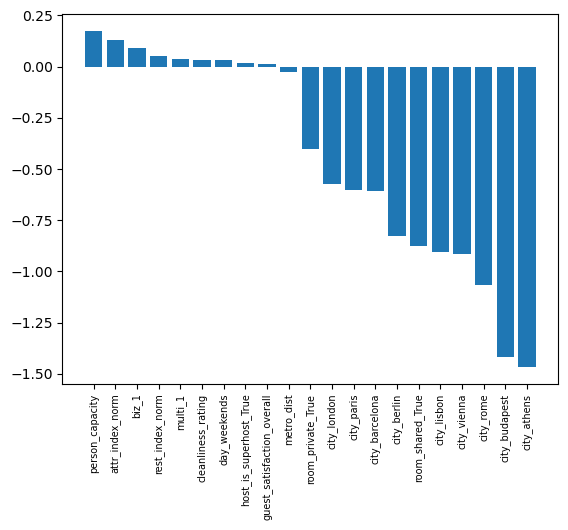

In [ ]:
#### Show the coefficients
coe_linear = pd.DataFrame()
coe_linear["Feature"] = linear_m_remove.feature_names_in_
coe_linear["Value"] = linear_m_remove.coef_
# Sort the coefficients
coe_linear = coe_linear.sort_values(by = ["Value"], ascending = False)
# Visualise the coefficients
fig, ax = plt.subplots()
ax.bar(coe_linear["Feature"], coe_linear["Value"])
ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)

#[i+": "+j.astype(str) for i, j in zip(linear_m_remove.feature_names_in_, linear_m_remove.coef_)]

Both strategies work for the linear regression model, the coefficients are making sense. MAE, MSE and adjusted R-squared score are better in the 2nd model which keeps cities and removes the coordinates (lat, lng)

Combined with the correlation matrix from the EDA, the model result indicates that some features may have multicollinearity in the dataset. To further explore the relationship between features, VIF is introduced to identify correlated features.

In the feature selection process, cities and coordinates are selected as those with high VIF values, and one of them must be excluded from the dataset. Both excluding strategies are implemented, and the model that was trained on data with cities (MAE 78.4, MAPE 26.5, MSE 45218.4, R-square 0.364) performs better than the one with coordinates (MAE 89.3, MAPE 30.6, MSE 49558.2, R-square 0.303). The coefficients are also easier to interpret compared to the first linear model. Eventually, the one trained on cities is kept as the second linear model. Comparing to the first model, the second model seems to have reasonable coefficients, at the expense of a slightly lower model performance.

### **Regularization**


Aside from eliminating the correlated features, adding a regularization term will also help reduce model bias.

Ridge regression and Lasso regression were applied in the next parts.

### 3.5.3 Ridge Regression

In [ ]:
#### Set the range of Grid Search
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#### Fit the linear model with Ridge regularisation
ridge_m = Ridge()
# 5-fold cross-validation
ridge_m = GridSearchCV(ridge_m, param_grid, cv=5)
ridge_m.fit(X_train, y_train)
# check the value of alpha
best_alpha_ridge = ridge_m.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha_ridge}")
# predict the test result
y_pred_ridge = ridge_m.predict(X_test)

Best alpha for Ridge Regression: 0.001


In [ ]:
print('Ridge Regression with Log-transformation: \n ', compute_metrics(np.expm1(y_test), np.expm1(y_pred_ridge)))

Ridge Regression with Log-transformation: 
  {'MAE': 75.55889924145679, 'MAPE': 25.71958357988492, 'R2': 0.39477397492694, 'MSE': 43056.10293100994}


C:\Users\xiaoc\AppData\Local\Temp\ipykernel_25076\3600995055.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)


[Text(0, 0, 'city_athens'),
 Text(1, 0, 'city_budapest'),
 Text(2, 0, 'city_vienna'),
 Text(3, 0, 'city_berlin'),
 Text(4, 0, 'city_rome'),
 Text(5, 0, 'lat'),
 Text(6, 0, 'person_capacity'),
 Text(7, 0, 'biz_1'),
 Text(8, 0, 'bedrooms'),
 Text(9, 0, 'attr_index_norm'),
 Text(10, 0, 'multi_1'),
 Text(11, 0, 'rest_index'),
 Text(12, 0, 'cleanliness_rating'),
 Text(13, 0, 'day_weekends'),
 Text(14, 0, 'rest_index_norm'),
 Text(15, 0, 'host_is_superhost_True'),
 Text(16, 0, 'attr_index'),
 Text(17, 0, 'guest_satisfaction_overall'),
 Text(18, 0, 'metro_dist'),
 Text(19, 0, 'dist'),
 Text(20, 0, 'room_private_True'),
 Text(21, 0, 'room_type_Private room'),
 Text(22, 0, 'room_shared_True'),
 Text(23, 0, 'room_type_Shared room'),
 Text(24, 0, 'city_barcelona'),
 Text(25, 0, 'city_paris'),
 Text(26, 0, 'city_london'),
 Text(27, 0, 'lng'),
 Text(28, 0, 'city_lisbon')]

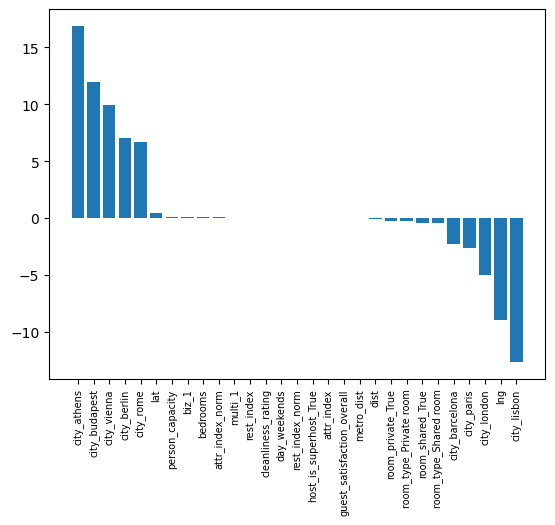

In [ ]:
#### Show the coefficients
coe_linear = pd.DataFrame()
coe_linear["Feature"] = ridge_m.best_estimator_.feature_names_in_
coe_linear["Value"] = ridge_m.best_estimator_.coef_
# Sort the coefficients
coe_linear = coe_linear.sort_values(by = ["Value"], ascending = False)
# Visualise the coefficients
fig, ax = plt.subplots()
ax.bar(coe_linear["Feature"], coe_linear["Value"])
ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)

#[i+": "+j.astype(str) for i, j in zip(ridge_m.best_estimator_.feature_names_in_, ridge_m.best_estimator_.coef_)]

### 3.5.4 Lasso Regression

In [ ]:
#### Fit the linear model with Lasso regularisation
lasso_m = Lasso()
# 5-fold cross-validation
lasso_m = GridSearchCV(lasso_m, param_grid, cv=5)
lasso_m.fit(X_train, y_train)
# check the value of alpha
best_alpha_ridge = ridge_m.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha_ridge}")
# predict the test result
y_pred_lasso = lasso_m.predict(X_test)

c:\Users\xiaoc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+03, tolerance: 1.029e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\xiaoc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+03, tolerance: 1.049e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\xiaoc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+03, toleranc

Best alpha for Ridge Regression: 0.001


c:\Users\xiaoc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e+03, tolerance: 1.292e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print('Lasso Regression with Log-transformation: \n ', compute_metrics(np.expm1(y_test), np.expm1(y_pred_lasso)))

Lasso Regression with Log-transformation: 
  {'MAE': 76.09299982009337, 'MAPE': 25.900326198459826, 'R2': 0.390607513352891, 'MSE': 43352.507234457895}


C:\Users\xiaoc\AppData\Local\Temp\ipykernel_25076\2042599528.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)


[Text(0, 0, 'lat'),
 Text(1, 0, 'person_capacity'),
 Text(2, 0, 'biz_1'),
 Text(3, 0, 'attr_index_norm'),
 Text(4, 0, 'bedrooms'),
 Text(5, 0, 'multi_1'),
 Text(6, 0, 'rest_index'),
 Text(7, 0, 'cleanliness_rating'),
 Text(8, 0, 'day_weekends'),
 Text(9, 0, 'rest_index_norm'),
 Text(10, 0, 'host_is_superhost_True'),
 Text(11, 0, 'guest_satisfaction_overall'),
 Text(12, 0, 'attr_index'),
 Text(13, 0, 'room_shared_True'),
 Text(14, 0, 'room_private_True'),
 Text(15, 0, 'metro_dist'),
 Text(16, 0, 'dist'),
 Text(17, 0, 'city_barcelona'),
 Text(18, 0, 'city_athens'),
 Text(19, 0, 'lng'),
 Text(20, 0, 'city_rome'),
 Text(21, 0, 'city_vienna'),
 Text(22, 0, 'city_lisbon'),
 Text(23, 0, 'city_paris'),
 Text(24, 0, 'room_type_Private room'),
 Text(25, 0, 'city_berlin'),
 Text(26, 0, 'city_london'),
 Text(27, 0, 'city_budapest'),
 Text(28, 0, 'room_type_Shared room')]

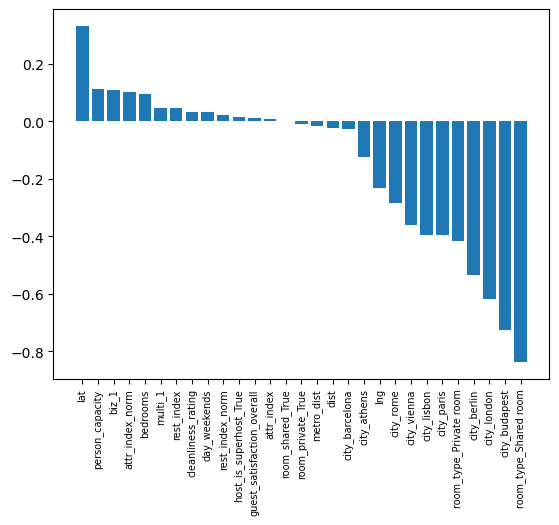

In [ ]:
#### Show the coefficients
coe_linear = pd.DataFrame()
coe_linear["Feature"] = lasso_m.best_estimator_.feature_names_in_
coe_linear["Value"] = lasso_m.best_estimator_.coef_
# Sort the coefficients
coe_linear = coe_linear.sort_values(by = ["Value"], ascending = False)
# Visualise the coefficients
fig, ax = plt.subplots()
ax.bar(coe_linear["Feature"], coe_linear["Value"])
ax.set_xticklabels(coe_linear["Feature"], rotation = 90, fontsize = 7)

#[i+": "+j.astype(str) for i, j in zip(lasso_m.best_estimator_.feature_names_in_, lasso_m.best_estimator_.coef_)]

Both regularization models are trained on all features, since these models are used for addressing the multi-collinearity problem . In addition, the Grid-Search method with cross validation was applied for hyperparameter tuning.

The two regularised models do not vary much with regard to the model performance (Ridge: MAE 75.6, MAPE 25.7, MSE 43056.1, R-square 0.395, Lasso: MAE 76.1, MAPE 25.9, MSE 43352.5, R-square 0.391), when the Ridge model slightly outperformed the Lasso model. In terms of the feature coefficients, Lasso’s coefficients vary within a smaller range.

### **3.6 MutliLayer Perceptron (MLP)**
MutliLayer Perceptron (MLP): We have tried the MultiLayer Pereceptron here to see if the neural network will handle the non-linear relationships well by learning mappings between input features and price outputs. 

In [102]:
df_network = pd.read_csv('prep_data_ver2.csv')
# Using the log of realSum to address the skewness
X = df_network.drop(columns=['realSum', 'log_realSum'])
# we dont need the normalized index columns as we have applied our own scaling to normalize the original index columns
X.drop(columns=['attr_index_norm', 'rest_index_norm'], inplace=True)
y = df_network['log_realSum']

In [103]:
# Split the dataset into train-val-test (40-30-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

print("Training shape: {}".format(X_train.shape))
print("Validation shape: {}".format(X_val.shape))
print("Testing shape: {}".format(X_test.shape))

Training shape: (25335, 27)
Validation shape: (10859, 27)
Testing shape: (15513, 27)


In [104]:
X_train.columns

Index(['room_type_Private room', 'room_type_Shared room', 'room_shared_True',
       'room_private_True', 'host_is_superhost_True', 'city_athens',
       'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon',
       'city_london', 'city_paris', 'city_rome', 'city_vienna', 'day_weekends',
       'multi_1', 'biz_1', 'person_capacity', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'rest_index', 'lng', 'lat'],
      dtype='object')

In [142]:
# Define the model
def train_model(hp):    
    num_units_l1 = hp.Int('num_units_l1', min_value = 200, max_value=260) 
    num_units_l2 = hp.Int('num_units_l2', min_value = 150, max_value=200) 
    num_units_l3 = hp.Int('num_units_l3', min_value = 30, max_value=50) 
    num_units_l4 = hp.Int('num_units_l4', min_value = 10, max_value=20) 
    # num_units_l5 = hp.Int('num_units_l5', min_value = 3, max_value=5) 


    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value=0.3) 
    learning_rate = hp.Float('learning_rate', min_value = 0.001, max_value=0.1, sampling='log') 
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_units_l1, activation="relu", input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l2, activation="relu"),
        tf.keras.layers.Dense(num_units_l3, activation="relu"),
        tf.keras.layers.Dense(num_units_l4, activation="relu"),
        # tf.keras.layers.Dense(num_units_l5, activation="relu"),
        tf.keras.layers.Dense(1)])
    
    model.compile(  optimizer=tf.keras.optimizers.experimental.Adam(learning_rate = learning_rate),
                    loss='mean_squared_error',
                    metrics = ["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    
    return model

In [143]:
import datetime
current_timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define the tuner
tuner = kt.Hyperband(train_model,
                     objective='val_mean_squared_error',
                     max_epochs=15,
                     factor=3,
                     directory='logs',
                     project_name='aml_' + current_timestamp)
# Perform the hypertuning
tuner.search(X_train, y_train, validation_data=(X_val,y_val))

Trial 30 Complete [00h 00m 28s]
val_mean_squared_error: 0.34597063064575195

Best val_mean_squared_error So Far: 0.09913589060306549
Total elapsed time: 00h 06m 22s
INFO:tensorflow:Oracle triggered exit


In [145]:
# Get the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters()[0]
print("Best number of hidden units:", best_hps['num_units_l1'])
print("Best number of hidden units:", best_hps['num_units_l2'])
print("Best number of hidden units:", best_hps['num_units_l3'])
print("Best number of hidden units:", best_hps['num_units_l4'])
# print("Best number of hidden units:", best_hps['num_units_l5'])
print("Best dropout rate:", best_hps['dropout_rate'])
print("Best learning rate:", best_hps['learning_rate'])

Best number of hidden units: 215
Best number of hidden units: 173
Best number of hidden units: 46
Best number of hidden units: 10
Best dropout rate: 0.13512455813963803
Best learning rate: 0.003113584078621141


In [146]:
# Train the model
best_model = tuner.hypermodel.build(best_hps)

In [147]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=early_stopping_cb)

Epoch 1/50
792/792 [==============================] - 2s 2ms/step - loss: 0.4999 - mean_squared_error: 0.4999 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 8.0459 - val_loss: 0.1825 - val_mean_squared_error: 0.1825 - val_mean_absolute_error: 0.3266 - val_mean_absolute_percentage_error: 5.8692
Epoch 2/50
792/792 [==============================] - 2s 2ms/step - loss: 0.1663 - mean_squared_error: 0.1663 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 5.6989 - val_loss: 0.1404 - val_mean_squared_error: 0.1404 - val_mean_absolute_error: 0.2898 - val_mean_absolute_percentage_error: 5.4386
Epoch 3/50
792/792 [==============================] - 2s 2ms/step - loss: 0.1497 - mean_squared_error: 0.1497 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 5.3732 - val_loss: 0.1147 - val_mean_squared_error: 0.1147 - val_mean_absolute_error: 0.2513 - val_mean_absolute_percentage_error: 4.6296
Epoch 4/50
792/792 [==============================] - 1s 2ms/ste

In [148]:
# Evaluate the model
net_y_pred = best_model.predict(X_test)

# Calculate performance metrics
print('Network with log transformation: \n ', compute_metrics(np.expm1(y_test), np.expm1(net_y_pred.reshape(-1))))


485/485 [==============================] - 0s 764us/step
Network with log transformation: 
  {'MAE': 77.43279669485966, 'MAPE': 24.507617098249483, 'R2': 0.2765146397882847, 'MSE': <tf.Tensor: shape=(), dtype=float32, numpy=88837.93>}


In [ ]:
# Extract the encoded features from the best autoencoder model
encoder = tf.keras.Sequential(best_model_ae.layers[:4])
X_train_encoded = encoder.predict(X_train)
X_val_encoded = encoder.predict(X_val)
X_test_encoded = encoder.predict(X_test)

# Define the MLP model for price prediction
def train_model(hp):    
    num_units_l1 = hp.Int('num_units_l1', min_value = 10, max_value=15) 
    num_units_l2 = hp.Int('num_units_l2', min_value = 5, max_value=10)  
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value=0.3) 
    learning_rate = hp.Float('learning_rate', min_value = 0.001, max_value=0.1, sampling='log') 
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_units_l1, activation="relu", input_shape=[X_train_encoded.shape[1]]),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l2, activation="relu"),
        tf.keras.layers.Dense(1)])
    
    model.compile(  optimizer=tf.keras.optimizers.experimental.Adam(learning_rate = learning_rate),
                    loss='mean_squared_error',
                    metrics = ["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

current_timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define the tuner
tuner_mlp = kt.Hyperband(train_model,
                     objective='val_mean_squared_error',
                     max_epochs=5,
                     factor=3,
                     directory='logs',
                     project_name='aml_' + current_timestamp)
# Perform the hypertuning
tuner_mlp.search(X_train_encoded, y_train, validation_data=(X_val_encoded, y_val))

Trial 10 Complete [00h 00m 07s]
val_mean_squared_error: 0.1375529021024704

Best val_mean_squared_error So Far: 0.12695597112178802
Total elapsed time: 00h 00m 43s
INFO:tensorflow:Oracle triggered exit


### **3.7 Autoencoder**

Here, we tried another neural network 'Autoencoder' relevant to our dataset to see if this model would give us better performance for price prediction in terms of lesser MSE and a better R2. We will train the Autoencoder and use the encoder part to extract the latent representation of new input data (dimension reduction). Next, we feed this to the MLP model for price prediction and see if this approach works better.

In [126]:
# Define the model
def train_model(hp):    
    num_units_l1 = hp.Int('num_units_l1', min_value = 20, max_value=25) 
    num_units_l2 = hp.Int('num_units_l2', min_value = 15, max_value=20) 
    num_units_l3 = hp.Int('num_units_l3', min_value = 5, max_value=15) 

    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value=0.3) 
    learning_rate = hp.Float('learning_rate', min_value = 0.001, max_value=0.1, sampling='log') 
    
    # Encoder
    encoder = tf.keras.models.Sequential([ 
        tf.keras.layers.Dense(num_units_l1, activation="relu", input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l2, activation="relu"),
        tf.keras.layers.Dense(num_units_l3, activation="relu"),
    ])

    # Decoder
    decoder = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_units_l2, activation="relu"),
        tf.keras.layers.Dense(num_units_l1, activation="relu"),
        tf.keras.layers.Dense(X_train.shape[1])
    ])

    model = tf.keras.models.Sequential([encoder, decoder])
    
    model.compile(  optimizer=tf.keras.optimizers.experimental.Adam(learning_rate = learning_rate),
                    loss='mean_squared_error',
                    metrics = ["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    
    return model

In [127]:
import datetime
current_timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define the tuner
tuner_ae = kt.Hyperband(train_model,
                     objective='val_mean_squared_error',
                     max_epochs=5,
                     factor=3,
                     directory='logs',
                     project_name='aml_' + current_timestamp)
# Perform the hypertuning
tuner_ae.search(X_train, X_train, validation_data=(X_val, X_val))

Trial 10 Complete [00h 00m 08s]
val_mean_squared_error: 0.32301217317581177

Best val_mean_squared_error So Far: 0.06841450184583664
Total elapsed time: 00h 00m 56s
INFO:tensorflow:Oracle triggered exit


In [128]:
# Get the best hyperparameters from the tuner
best_hps_ae = tuner_ae.get_best_hyperparameters()[0]
print("Best number of hidden units:", best_hps_ae['num_units_l1'])
print("Best number of hidden units:", best_hps_ae['num_units_l2'])
print("Best number of hidden units:", best_hps_ae['num_units_l3'])
print("Best dropout rate:", best_hps_ae['dropout_rate'])
print("Best learning rate:", best_hps_ae['learning_rate'])

Best number of hidden units: 22
Best number of hidden units: 15
Best number of hidden units: 9
Best dropout rate: 0.1405873087205472
Best learning rate: 0.0033176025451695365


In [129]:
# Train the autoencoder with the best hyperparameters
best_model_ae = tuner_ae.hypermodel.build(best_hps_ae)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
best_model_ae.fit(X_train, X_train, epochs=30, validation_data=(X_val, X_val), callbacks=early_stopping_cb)

Epoch 1/30
792/792 [==============================] - 2s 2ms/step - loss: 0.1759 - mean_squared_error: 0.1759 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 77872200.0000 - val_loss: 0.1078 - val_mean_squared_error: 0.1078 - val_mean_absolute_error: 0.2257 - val_mean_absolute_percentage_error: 68801680.0000
Epoch 2/30
792/792 [==============================] - 1s 2ms/step - loss: 0.1164 - mean_squared_error: 0.1164 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 70597576.0000 - val_loss: 0.0926 - val_mean_squared_error: 0.0926 - val_mean_absolute_error: 0.2016 - val_mean_absolute_percentage_error: 62026768.0000
Epoch 3/30
792/792 [==============================] - 1s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 68136144.0000 - val_loss: 0.0866 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.1997 - val_mean_absolute_percentage_error: 69511352.0000
Epoch 4/30
792/792 [==

In [130]:
# Extract the encoded features from the best autoencoder model
encoder = tf.keras.Sequential(best_model_ae.layers[:4])
X_train_encoded = encoder.predict(X_train)
X_val_encoded = encoder.predict(X_val)
X_test_encoded = encoder.predict(X_test)

# Define the MLP model for price prediction
def train_model(hp):    
    num_units_l1 = hp.Int('num_units_l1', min_value = 10, max_value=15) 
    num_units_l2 = hp.Int('num_units_l2', min_value = 5, max_value=10)  
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value=0.3) 
    learning_rate = hp.Float('learning_rate', min_value = 0.001, max_value=0.1, sampling='log') 
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_units_l1, activation="relu", input_shape=[X_train_encoded.shape[1]]),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units_l2, activation="relu"),
        tf.keras.layers.Dense(1)])
    
    model.compile(  optimizer=tf.keras.optimizers.experimental.Adam(learning_rate = learning_rate),
                    loss='mean_squared_error',
                    metrics = ["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

current_timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Define the tuner
tuner_mlp = kt.Hyperband(train_model,
                     objective='val_mean_squared_error',
                     max_epochs=5,
                     factor=3,
                     directory='logs',
                     project_name='aml_' + current_timestamp)
# Perform the hypertuning
tuner_mlp.search(X_train_encoded, y_train, validation_data=(X_val_encoded, y_val))

Trial 10 Complete [00h 00m 07s]
val_mean_squared_error: 0.1375529021024704

Best val_mean_squared_error So Far: 0.12695597112178802
Total elapsed time: 00h 00m 43s
INFO:tensorflow:Oracle triggered exit


In [131]:
# Get the best hyperparameters
best_hps_mlp = tuner_mlp.get_best_hyperparameters()[0]
print("Best number of hidden units:", best_hps_mlp['num_units_l1'])
print("Best number of hidden units:", best_hps_mlp['num_units_l2'])
print("Best dropout rate:", best_hps_mlp['dropout_rate'])
print("Best learning rate:", best_hps_mlp['learning_rate'])

Best number of hidden units: 13
Best number of hidden units: 6
Best dropout rate: 0.12046588205613032
Best learning rate: 0.010426853105562454


In [132]:
# Train the MLP 
best_model_mlp = tuner_mlp.hypermodel.build(best_hps_mlp)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
best_model_mlp.fit(X_train_encoded, y_train, epochs=30, validation_data=(X_val_encoded, y_val), callbacks=early_stopping_cb)

Epoch 1/30
792/792 [==============================] - 2s 1ms/step - loss: 0.7560 - mean_squared_error: 0.7560 - mean_absolute_error: 0.5106 - mean_absolute_percentage_error: 9.3901 - val_loss: 0.1352 - val_mean_squared_error: 0.1352 - val_mean_absolute_error: 0.2727 - val_mean_absolute_percentage_error: 5.0309
Epoch 2/30
792/792 [==============================] - 1s 1ms/step - loss: 0.1533 - mean_squared_error: 0.1533 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 5.3906 - val_loss: 0.1284 - val_mean_squared_error: 0.1284 - val_mean_absolute_error: 0.2638 - val_mean_absolute_percentage_error: 4.8557
Epoch 3/30
792/792 [==============================] - 1s 1ms/step - loss: 0.1418 - mean_squared_error: 0.1418 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 5.1650 - val_loss: 0.1278 - val_mean_squared_error: 0.1278 - val_mean_absolute_error: 0.2641 - val_mean_absolute_percentage_error: 4.8694
Epoch 4/30
792/792 [==============================] - 1s 1ms/ste

In [133]:
# Evaluate the model
net2_y_pred = best_model_mlp.predict(X_test_encoded)

# Calculate performance metrics
print('Network with log transformation: \n ', compute_metrics(np.expm1(y_test), np.expm1(net2_y_pred.reshape(-1))))

485/485 [==============================] - 0s 554us/step
Network with log transformation: 
  {'MAE': 83.03030670344853, 'MAPE': 27.56033098838666, 'R2': 0.24565150633162458, 'MSE': <tf.Tensor: shape=(), dtype=float32, numpy=92627.68>}


In order to predict prices without explicit engineering of features, we employed a deep neural network in the form of a Multi-Layer Perceptron (MLP). The MLP was trained using supervised learning with its inputs being the independent variables of the dataset and its expected output being the price of the listing. We use MSE as the loss function for training. Hyperparameters of the network such as the number of neurons in each layer, learning rate and dropout are computed through hyperparameter tuning. With the MLP we aim to implicitly capture the complex relationship between the dependent and the independent variable. The model did not perform well, which could be due to issues with the data/features or the presence of outliers. As there is a lack of direct interpretability of the importance of individual features, it becomes difficult to spot the problem. 


In another approach, we tried an Autoencoder to compress the input data into a lower dimensional latent space representation. This representation can capture the essential features and patterns relevant to price prediction. The Autoencoder was trained with the input being the independent variables in order to reconstruct the same. Once the training is done, only the encoder is used to extract the compressed features from the dataset. These features are then input to another MLP which predicts the prices. However, this model does not outperform the MLP.


## **4. Business Insights and Applications**
This project can provide valuable insights and assistance to Airbnb owners in several ways. Firstly, by predicting Airbnb prices in European cities, owners can gain a better understanding of the factors that influence pricing and make data-driven decisions when setting their own rental rates. They can adjust their pricing strategy based on the identified significant features, such as the number of bedrooms, location coordinates, and other relevant attributes. This can help them optimize their pricing to attract more guests while ensuring competitive rates.

Furthermore, the project can help Airbnb owners identify the peak seasons and high-demand periods in specific cities. With this knowledge, owners can strategically adjust their availability and pricing during these times to maximize their occupancy rates and revenue. They can offer higher rates during peak seasons when demand is high and adjust prices accordingly during low-demand periods to maintain a steady flow of guests. This approach can lead to improved financial performance and better utilization of their rental properties.

Moreover, the insights from the project can guide Airbnb owners in enhancing their property listings. By understanding the features that have a significant impact on prices, owners can focus on improving those aspects of their accommodations. For example, they can invest in upgrading bedrooms, adding amenities, or highlighting proximity to attractions or popular landmarks. This can help them attract more bookings, increase customer satisfaction, and potentially command higher prices.

Additionally, the project's findings can assist Airbnb owners in making data-informed decisions regarding property investments. By analyzing the key factors that influence Airbnb prices, owners can evaluate potential properties for purchase or rental with a better understanding of their income-generating potential. They can identify locations and property characteristics that align with the features driving higher prices, which can guide their investment decisions and maximize their return on investment.

## **4. Conclusions and Recommendations**

Linear regression offers direct interpretability but assumes linearity and requires a high level of data pre-processing, especially in this task due to the multicollinearity issue. Meanwhile, decision trees and random forests provide intermediate interpretability and handle non-linear relationships but they are not as performant as the XGBoost models. Neural network models excel in non-linearity but can be computationally intensive and complicated to interpret results. XGBoost strikes a balance by offering strong performance, robustness to outliers, and moderate interpretability.

Among other models being used in this project, **the third XGBoost model with feature selection** stands out with its high predictive accuracy, built-in feature selection, and ability to capture non-linear relationships. It has the highest R2, and its MSE is only higher than those of linear regression models that we tried. Hence, we decided to choose this model's results as insights for strategic business analysis and implications in this case.

In addition, to enhance the insights that this analysis can bring, more information can be collected and scraped from the airbnb website and added to the dataset, such as: the number of reviews, ratings, detailed of reviews, property description (house rules, safety, cancellation policy), number of bookings per month, pricing structure, etc. These information can be helpful to analyse whether the pricing of a property is suitable or not, factors that contribute to a popular airbnb, what customers care about, etc.


